# Exploring INPA's Bird Collection Database 

> *written by Nelson Buainain, 2021*

<img src=https://acta.inpa.gov.br/logo_inpa/COLECOES/PNG/colecoes-recursosgeneticos.png width="300">

## Data description 

This database consist of about 28,000 records genetic material of bird that are housed at INPA's scientific collection. These records have been collected in the past decades and, although there was an attempt to standardize the quality and completeness of data, this is mostly not consistent. I extensively reviewed this database correcting and inserting missing data information in the past one year. This process was done mostly manually using Microsoft Excel because of the importance to keep correctness of information of each individual data. Thus, all the ramaining missing data is mostly information that could not be retrieved and could not be inputed. Pandas was used to help visualizing missing data and get a general view of the database.

## Purpose

This is the code I used as part of a data science project to explore the Instituto Nacional de Pesquisas da Amazonia (INPA)'s bird tissue collection. 

The goal of this project was to:

* check the quality of the data being input in the database 
* check how much data is missing and what are the most problematic fields
* infer what are the most and least representative groups, areas, collectors, etc, in the collection 
* provide some basic statistics about the collection


This will help to improve future decisions on how to manage information, improve data collecting, optimize financial resources for future expeditions, which taxa to collect and to not collect, etc... 

## Variables descriptions

## Importing packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Importing some functions that will be useful along the analses

In [686]:
# A second function to add percentage over countplot, I will leave this here as backup
# Function to add percentage over bars in count plots
# def bar_percentage(plot, feature):
#     total = len(feature)
#     for p in ax.patches:
#         percentage = '{:.1f}%'.format(100 * p.get_height()/total)
#         x = p.get_x() + p.get_width() / 3.5 - 0.05
#         y = p.get_y() + p.get_height()
#         ax.annotate(percentage, (x, y), size = 12,ha='center', va='bottom')

In [2]:
#ANOTHER FUNCTION TO ADD PERCENTAGE OVER BAR OR COUNT PLOT
def add_perc(plot, feature):
    total = len(feature)
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/len(feature)), (x.mean(), y), ha='center', va='bottom')


## Importing the database

In [6]:
db = pd.read_csv('../database/inpa_bird_collection_database.csv',sep=';',decimal=',')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (3,38,40,42,43,45,46,47,49,50,51,53) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [7]:
db.head()

,No TEC.,numero,Sigla prep,Nº prepa,Nome preparador,Sigla campo,Nº campo,ORDEM,FAMÍLIA,GÊNERO,...,GUIA N°.1,PARA.1,EMPRESTADO.2,DATA.2,GUIA N°.2,PARA.2,EMPRESTADO.3,DATA.3,GUIA N°.3,PARA.3
0,INPA A 001,1,MCH,553.0,Mario Cohn-Haft,NaN,NaN,Passeriformes,Tyrannidae,Elaenia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,INPA A 002,2,LNN,4.0,Luciano Nicolás Naka,NaN,NaN,Piciformes,Capitonidae,Capito,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,INPA A 003,3,AMF,64.0,Alexandre Mendes Fernandes,NaN,NaN,Galbuliformes,Galbulidae,Galbalcyrhynchus,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,INPA A 004,4,MCH,554.0,Mario Cohn-Haft,NaN,NaN,Passeriformes,Thamnophilidae,Hypocnemoides,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,INPA A 005,5,LNN,5.0,Luciano Nicolás Naka,NaN,NaN,Passeriformes,Troglodytidae,Pheugopedius,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Getting to know our data base

> We will take a look at the general information of our dataset to start to get know it

In [8]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28734 entries, 0 to 28733
Data columns (total 54 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   No TEC.              28734 non-null  object 
 1   numero               28734 non-null  int64  
 2   Sigla prep           14831 non-null  object 
 3   Nº prepa             13162 non-null  object 
 4   Nome preparador      25331 non-null  object 
 5   Sigla campo          16278 non-null  object 
 6   Nº campo             16291 non-null  object 
 7   ORDEM                26483 non-null  object 
 8   FAMÍLIA              26483 non-null  object 
 9   GÊNERO               26490 non-null  object 
 10  ESPÉCIE              26263 non-null  object 
 11  GÊNERO ESPÉCIE       26490 non-null  object 
 12  SEXO                 18363 non-null  object 
 13  EXPEDIÇÃO            19687 non-null  object 
 14  EST                  26368 non-null  object 
 15  LOCALIDADE           26421 non-null 

In [9]:
db.columns

Index(['No TEC.', 'numero', 'Sigla prep', 'Nº prepa', 'Nome preparador',
       'Sigla campo', 'Nº campo', 'ORDEM', 'FAMÍLIA', 'GÊNERO', 'ESPÉCIE',
       'GÊNERO ESPÉCIE', 'SEXO', 'EXPEDIÇÃO', 'EST', 'LOCALIDADE',
       'area_endemism', 'LAT G', 'LAT M', 'LAT S', 'LAT_N/S', 'LON G', 'LON M',
       'LON S', 'LON_E/W', 'LAT_DEC', 'LON_DEC', 'TEMPO ATÉ CONSERVAR',
       'MÉTODO DE COLETA', 'MÚSCULO', 'CORAÇÃO', 'FÍGADO', 'SANGUE',
       'MEIO PRESERV. DEF.', 'DATA COLETA', 'DATA PREP.', 'OBSERVAÇÕES',
       'EMPRESTADO', 'DATA', 'GUIA N°', 'PARA', 'Obs', 'EMPRESTADO.1',
       'DATA.1', 'GUIA N°.1', 'PARA.1', 'EMPRESTADO.2', 'DATA.2', 'GUIA N°.2',
       'PARA.2', 'EMPRESTADO.3', 'DATA.3', 'GUIA N°.3', 'PARA.3'],
      dtype='object')

** We will select only the columns that may potentially will give us some interesting information **


In [10]:
data = db[['No TEC.', 'Nome preparador','ORDEM', 'FAMÍLIA', 'GÊNERO', 'ESPÉCIE', 'GÊNERO ESPÉCIE',
       'SEXO', 'EST', 'LOCALIDADE','area_endemism', 'LAT_DEC', 'LON_DEC',
       'TEMPO ATÉ CONSERVAR', 'MÉTODO DE COLETA', 'MÚSCULO', 'CORAÇÃO',
       'FÍGADO', 'SANGUE', 'MEIO PRESERV. DEF.', 'DATA COLETA', 'DATA PREP.',
'EMPRESTADO', 'DATA', 'GUIA N°', 'PARA', 'Obs', 'EMPRESTADO.1',
       'DATA.1', 'GUIA N°.1', 'PARA.1', 'EMPRESTADO.2', 'DATA.2', 'GUIA N°.2',
       'PARA.2', 'EMPRESTADO.3', 'DATA.3', 'GUIA N°.3', 'PARA.3']]

In [11]:
data.head()

,No TEC.,Nome preparador,ORDEM,FAMÍLIA,GÊNERO,ESPÉCIE,GÊNERO ESPÉCIE,SEXO,EST,LOCALIDADE,...,GUIA N°.1,PARA.1,EMPRESTADO.2,DATA.2,GUIA N°.2,PARA.2,EMPRESTADO.3,DATA.3,GUIA N°.3,PARA.3
0,INPA A 001,Mario Cohn-Haft,Passeriformes,Tyrannidae,Elaenia,parvirostris,Elaenia parvirostris,F,AM,"ca 60 km ENE Tabatinga, margem direita Rio Sol...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,INPA A 002,Luciano Nicolás Naka,Piciformes,Capitonidae,Capito,aurovirens,Capito aurovirens,M,AM,"ca 60 km ENE Tabatinga, margem direita Rio Sol...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,INPA A 003,Alexandre Mendes Fernandes,Galbuliformes,Galbulidae,Galbalcyrhynchus,leucotis,Galbalcyrhynchus leucotis,F,AM,"ca 60 km ENE Tabatinga, margem direita Rio Sol...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,INPA A 004,Mario Cohn-Haft,Passeriformes,Thamnophilidae,Hypocnemoides,maculicauda,Hypocnemoides maculicauda,M,AM,"ca 60 km ENE Tabatinga, margem direita Rio Sol...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,INPA A 005,Luciano Nicolás Naka,Passeriformes,Troglodytidae,Pheugopedius,genibarbis,Pheugopedius genibarbis,M,AM,"Boca rio Jandietuba, ca 12 km E São Paulo de O...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


** Record without genus/species identification and locality are likely to be errors, reserved spots in the database or simply undesirable for our purpose to I will exclude them to see some general count numbers **

In [12]:
data[(~data['GÊNERO'].isnull()) & (~data['LOCALIDADE'].isnull())].count()

No TEC.                26374
Nome preparador        25165
ORDEM                  26368
FAMÍLIA                26368
GÊNERO                 26374
ESPÉCIE                26151
GÊNERO ESPÉCIE         26374
SEXO                   18260
EST                    26275
LOCALIDADE             26374
area_endemism          25856
LAT_DEC                26174
LON_DEC                26174
TEMPO ATÉ CONSERVAR     5927
MÉTODO DE COLETA       21601
MÚSCULO                12783
CORAÇÃO                 2656
FÍGADO                  2584
SANGUE                 13370
MEIO PRESERV. DEF.     24111
DATA COLETA            26180
DATA PREP.             14653
EMPRESTADO              1494
DATA                    1198
GUIA N°                 1198
PARA                    1198
Obs                        2
EMPRESTADO.1             165
DATA.1                   165
GUIA N°.1                165
PARA.1                   165
EMPRESTADO.2              39
DATA.2                    39
GUIA N°.2                 39
PARA.2        

** For further analyses I will admit records with no locality but record with no identification at least at the genus level are usually problematic and less informative so I will exclude them to produce some of the basic information **

In [13]:
data_clean = data.dropna(subset=['GÊNERO'])

In [14]:
data_clean.count()

No TEC.                26490
Nome preparador        25281
ORDEM                  26483
FAMÍLIA                26483
GÊNERO                 26490
ESPÉCIE                26263
GÊNERO ESPÉCIE         26490
SEXO                   18337
EST                    26328
LOCALIDADE             26374
area_endemism          25857
LAT_DEC                26175
LON_DEC                26175
TEMPO ATÉ CONSERVAR     5944
MÉTODO DE COLETA       21674
MÚSCULO                12871
CORAÇÃO                 2723
FÍGADO                  2651
SANGUE                 13390
MEIO PRESERV. DEF.     24217
DATA COLETA            26263
DATA PREP.             14742
EMPRESTADO              1498
DATA                    1202
GUIA N°                 1202
PARA                    1202
Obs                        3
EMPRESTADO.1             165
DATA.1                   165
GUIA N°.1                165
PARA.1                   165
EMPRESTADO.2              39
DATA.2                    39
GUIA N°.2                 39
PARA.2        

** Let's see what are the field with more missing data **

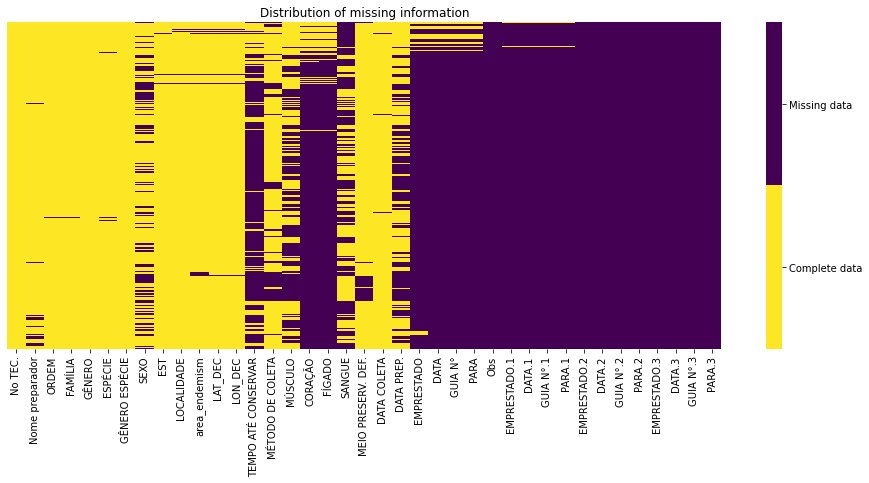

In [56]:
plt.figure(figsize=(16, 6))
ax = sns.heatmap(data_clean.isnull(),yticklabels=False,cbar=True,cmap=['#FDE725FF','#440154FF'])
plt.title('Distribution of missing information')
cbar = ax.collections[0].colorbar
cbar.set_ticks([0.75, 0.25])
cbar.set_ticklabels(['Missing data', 'Complete data'])


**We can see that the most problematic fields are: 'Nome do preparador', 'sexo', 'tempo até conservar', 'metodo de coleta', 'data preparacao'. The remaining fields are not necessarily missing data and might not just be applicable for that record**

Let's take a look at these samples

In [57]:
data_clean['Nome preparador'].isnull().sum()

1209

In [58]:
data_clean[data_clean['Nome preparador'].isna() == True].head()

,No TEC.,Nome preparador,ORDEM,FAMÍLIA,GÊNERO,ESPÉCIE,GÊNERO ESPÉCIE,SEXO,EST,LOCALIDADE,...,GUIA N°.1,PARA.1,EMPRESTADO.2,DATA.2,GUIA N°.2,PARA.2,EMPRESTADO.3,DATA.3,GUIA N°.3,PARA.3
6609,INPA A 6615,NaN,Passeriformes,Tyrannidae,Elaenia,cristata,Elaenia cristata,NaN,RR,"Parque Nacional do Viruá; Estrada Perdida, km ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6610,INPA A 6616,NaN,Passeriformes,Tyrannidae,Elaenia,cristata,Elaenia cristata,NaN,RR,"Parque Nacional do Viruá; Estrada Perdida, km ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6611,INPA A 6617,NaN,Passeriformes,Tyrannidae,Elaenia,cristata,Elaenia cristata,NaN,RR,"Parque Nacional do Viruá; Estrada Perdida, km ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6638,INPA A 6644,NaN,Passeriformes,Tyrannidae,Elaenia,ruficeps,Elaenia ruficeps,NaN,RR,"Parque Nacional do Viruá; Estrada Perdida, km ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6639,INPA A 6645,NaN,Passeriformes,Tyrannidae,Elaenia,cristata,Elaenia cristata,NaN,RR,"Parque Nacional do Viruá; Estrada Perdida, km ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
data_clean['SEXO'].isnull().sum()

8153

In [60]:
data_clean['SEXO'].value_counts()

M        9458
F        6336
I        2463
I (M)      42
MJ         10
F?          9
(M)         4
M?          3
F (M)       2
M           2
F           2
? F         1
I           1
            1
FJ          1
M/F?        1
F (?)       1
Name: SEXO, dtype: int64

** Sex needs to be taken more seriously... This is a mess **

In [61]:
data_clean[data_clean['MÉTODO DE COLETA'].isna() == True].sample(20)

,No TEC.,Nome preparador,ORDEM,FAMÍLIA,GÊNERO,ESPÉCIE,GÊNERO ESPÉCIE,SEXO,EST,LOCALIDADE,...,GUIA N°.1,PARA.1,EMPRESTADO.2,DATA.2,GUIA N°.2,PARA.2,EMPRESTADO.3,DATA.3,GUIA N°.3,PARA.3
6097,INPA A 6103,Jared Wolfe,Passeriformes,Thamnophilidae,Pithys,albifrons,Pithys albifrons,NaN,AM,"Fragmentos PDBFF, BR-174 80 km NE Manaus, Port...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22426,INPA A 22432,Mônica S Ribas/Roberta L. Boss,Passeriformes,Thamnophilidae,Oneillornis,salvini,Oneillornis salvini,F,RO,"Porto Velho, margem esquerda do Rio Madeira; M...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21623,INPA A 21629,Jaqueline Rizzi Fortuna,Passeriformes,Pipridae,Dixiphia,pipra,Dixiphia pipra,NaN,AM,"Rio Preto da Eva, BR 174 ca 60 km N de Manaus,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13686,INPA A 13692,Mateus Ferreira,Passeriformes,Thamnophilidae,Myrmotherula,menetriesii,Myrmotherula menetriesii,F,AM,"São Gabriel da Cachoeira, PPBIO (00o09'S;66o48'W)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4971,INPA A 4977,Cristiane Dreves,Passeriformes,Rhynchocyclidae,Todirostrum,maculatum,Todirostrum maculatum,F,AM,Manaus; INPA Campus II,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19966,INPA A 19972,Mariane Bosholn,Passeriformes,Pipridae,Lepidothrix,coronata,Lepidothrix coronata,F,AM,"BR 319, KM 100",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13867,INPA A 13873,Mateus Ferreira,Passeriformes,Xenopidae,Xenops,minutus,Xenops minutus,F,AM,"São Gabriel da Cachoeira, T.I. médio Rio Negro...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22457,INPA A 22463,Mônica S Ribas/Roberta L. Boss,Passeriformes,Thamnophilidae,Rhegmatorhina,melanosticta,Rhegmatorhina melanosticta,NaN,RO,"Porto Velho, margem esquerda do Rio Madeira; M...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21119,INPA A 21125,Fábio Nunes e Ileyne Lopes,Psittaciformes,Psittacidae,Pyrrhura,griseipectus,Pyrrhura griseipectus,M,CE,"Ceará, Serra do Baturité, Sítio Monte Rei, Cai...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2660,INPA A 2666,Ingrid Torres de Macedo,Gruiformes,Rallidae,Neocrex,erythrops,Neocrex erythrops,M,AM,Manaus,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
data_clean['MÉTODO DE COLETA'].isnull().sum()

4816

In [63]:
len(data_clean[(data_clean['MÉTODO DE COLETA'].isnull()) & (data_clean['SANGUE'] == 'X')])

2783

In [64]:
print(f'Percentage of missing data that are blood samples: {2783/4816*100}')

Percentage of missing data that are blood samples: 57.78654485049833


In [65]:
data_clean[(data_clean['MÉTODO DE COLETA'].isnull()) & (data_clean['SANGUE'] == 'X')].sample(10)

,No TEC.,Nome preparador,ORDEM,FAMÍLIA,GÊNERO,ESPÉCIE,GÊNERO ESPÉCIE,SEXO,EST,LOCALIDADE,...,GUIA N°.1,PARA.1,EMPRESTADO.2,DATA.2,GUIA N°.2,PARA.2,EMPRESTADO.3,DATA.3,GUIA N°.3,PARA.3
21301,INPA A 21307,Marco Aurélio Silva,Passeriformes,Thamnophilidae,Myrmotherula,axillaris,Myrmotherula axillaris,M,AM,"Presidente Figueiredo, Lago UHE Balbina, Loren...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21556,INPA A 21562,Beatriz Souza da Conceição,Passeriformes,Thamnophilidae,Thamnophilus,aethiops,Thamnophilus aethiops,M,AM,"BR319, ca. 380 km, Modulo PPBio 07, Trilha Sul...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22752,INPA A 22758,Mônica S Ribas/Roberta L. Boss,Passeriformes,Dendrocolaptidae,Xiphorhynchus,elegans,Xiphorhynchus elegans,NaN,RO,Porto Velho; margem esquerda do Rio Madeira; M...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21735,INPA A 21741,Jaqueline Rizzi Fortuna,Passeriformes,Pipridae,Dixiphia,pipra,Dixiphia pipra,NaN,AM,"Presidente Figueiredo, BR 174 ca 72 km N de Ma...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17437,INPA A 17443,Carolina Schuch de Oliveira,Passeriformes,Thamnophilidae,Willisornis,poecilinotus,Willisornis poecilinotus,M,AM,"PDBFF, Acampamento Cabo Frio, Trilha 6, T6 (02...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6185,INPA A 6191,Jared Wolfe,Passeriformes,Thamnophilidae,Myrmotherula,longipennis,Myrmotherula longipennis,NaN,AM,"Fragmentos PDBFF, BR-174 80 km NE Manaus, Port...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21969,INPA A 21975,João Vítor Campos e Silva,Passeriformes,Pipridae,Dixiphia,pipra,Dixiphia pipra,M,AM,"Manaus, BR 174 ca 60 km N de Manaus, Fazenda E...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22445,INPA A 22451,Mônica S Ribas/Roberta L. Boss,Passeriformes,Dendrocolaptidae,Dendrocincla,merula,Dendrocincla merula,NaN,RO,"Porto Velho, margem esquerda do Rio Madeira; M...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15745,INPA A 15751,Sérgio Henrique Borges,Passeriformes,Tityridae,Schiffornis,turdina,Schiffornis turdina,I,AM,"Campina arbustiva no Sítio Graúna II, Ramal do...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17492,INPA A 17498,Carolina Schuch de Oliveira,Passeriformes,Polioptilidae,Microbates,collaris,Microbates collaris,I,AM,"PDBFF, Acampamento Cabo Frio, Trilha 4, T4 (02...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
data_clean[data_clean['DATA PREP.'].isna() == True].sample(20)

,No TEC.,Nome preparador,ORDEM,FAMÍLIA,GÊNERO,ESPÉCIE,GÊNERO ESPÉCIE,SEXO,EST,LOCALIDADE,...,GUIA N°.1,PARA.1,EMPRESTADO.2,DATA.2,GUIA N°.2,PARA.2,EMPRESTADO.3,DATA.3,GUIA N°.3,PARA.3
6097,INPA A 6103,Jared Wolfe,Passeriformes,Thamnophilidae,Pithys,albifrons,Pithys albifrons,NaN,AM,"Fragmentos PDBFF, BR-174 80 km NE Manaus, Port...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8158,INPA A 8164,Cassiano Gatto e Laís Coelho,Passeriformes,Dendrocolaptidae,Dendrocincla,merula,Dendrocincla merula,I,AM,"Margem direita do Rio Purus; ""Igarapé do Jacin...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10555,INPA A 10561,Sérgio Henrique Borges,Passeriformes,Thraupidae,Tachyphonus,phoenicius,Tachyphonus phoenicius,M,AM,"Parna Jaú; margem direita do Rio Jaú, afluente...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5152,INPA A 5158,"Camila Ribas, Fernando Horta, Renato Gaban",Passeriformes,Rhynchocyclidae,Mionectes,oleagineus,Mionectes oleagineus,NaN,PA,"Aveiro, Rio Tapajós, margem esquerda, Escrivão...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19634,INPA A 19640,Erik Choueri,Passeriformes,Dendrocolaptidae,Glyphorynchus,spirurus,Glyphorynchus spirurus,I,AM,"Margem direita do Rio Negro, Comunidade Manacauca",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11854,INPA A 11860,Marcelo Barreiros,Passeriformes,Turdidae,Turdus,albicollis,Turdus albicollis,I,PA,Margem esquerda do Rio Tapajós; 70 km sudoeste...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23185,INPA A 23191,Mônica S Ribas/Roberta L. Boss,Passeriformes,Thamnophilidae,Hypocnemis,peruviana,Hypocnemis peruviana,F,RO,"Porto Velho, margem esquerda do Rio Madeira; M...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22595,INPA A 22601,Mônica S Ribas/Roberta L. Boss,Passeriformes,Pipridae,Ceratopipra,rubrocapilla,Ceratopipra rubrocapilla,M,RO,"Porto Velho, margem direita do rio Madeira; Mó...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1349,INPA A 1355,Jared Wolfe,Passeriformes,Formicariidae,Formicarius,colma,Formicarius colma,NaN,AM,"Dimona, Contígua, Reserva do PDBFF",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21381,INPA A 21387,Marco Aurélio Silva,Passeriformes,Thamnophilidae,Isleria,guttata,Isleria guttata,F,AM,"Presidente Figueiredo, Lago UHE Balbina, Loren...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1531]:
data_clean['DATA PREP.'].isnull().sum()

11748

**SUMMARY OF MISSING DATA INFORMATION**

* Nome of the preparador: This information is crucial but a minor part (2k records) of this field is missing.


* Sexo: About 1/4 of the records have missing inforamation. The remaining records lack standardization. This needs to be seriously improved, the values should only me Male (M), Female (F), and undetermined (I). When unknown, this should be coded as 'I' and not missing. A serious standardization is required as it is not even possible to understand some of the values used to correct. This should be discussed and oriented to future collector and with the person responsible for inputing data. 


* Metodo de coleta: These are likely either to not have been filled in the datasheet by the collector or by the person who input data in the collection since many of records the general completeness of the record does not indicate other reason


* Data de preparacao: About half of the missing information is represented by blood samples, which typically don't have a preparation because there is generally no skin specimen associated. The curator needs to decide if preparation time should be the same as the collection date or if kept missing. 

## General representativeness of the collection

> Let's plot some nice graphs to see how the samples are distributed along the different categories

### Taxonomic category

#### ORDER

In [1532]:
data_clean[~data_clean['ORDEM'].isnull()]['ORDEM'].unique()

array(['Passeriformes', 'Piciformes', 'Galbuliformes', 'Charadriiformes',
       'Gruiformes', 'Psittaciformes', 'Apodiformes', 'Galliformes',
       'Caprimulgiformes', 'Cuculiformes', 'Tinamiformes',
       'Falconiformes', 'Pelecaniformes', 'Strigiformes', 'Coraciiformes',
       'Columbiformes', 'Accipitriformes', 'Nyctibiiformes',
       'Trogoniformes', 'Opisthocomiformes', 'Anseriformes',
       'Eurypygiformes', 'Suliformes', 'Cathartiformes'], dtype=object)

In [1533]:
print(f"Total number of Orders in the collection: {len(data_clean[~data_clean['ORDEM'].isnull()]['ORDEM'].unique())}")

Total number of Orders in the collection: 24


In [1534]:
# A list of the orders present in the collection, number of specimens and representativeness
order_accounting = pd.DataFrame({'Number of Specimens':data_clean['ORDEM'].value_counts().values,'Percentage':(data_clean['ORDEM'].value_counts()/data_clean['ORDEM'].value_counts().sum())*100})
order_accounting

,Number of Specimens,Percentage
Passeriformes,23039,86.995431
Apodiformes,968,3.655175
Psittaciformes,480,1.812483
Galbuliformes,450,1.699203
Piciformes,395,1.491523
Columbiformes,297,1.121474
Coraciiformes,173,0.653249
Caprimulgiformes,133,0.502209
Trogoniformes,87,0.328513
Accipitriformes,75,0.283201


In [1440]:
order_accounting.to_csv('results/order_accounting.csv')

In [278]:
least_collected_orders = data_clean['ORDEM'].value_counts().loc[lambda x : x<5].to_frame().reset_index().set_axis(['Ordem','Samples'],axis=1).sort_values(by=['Samples','Ordem'])
least_collected_orders

,Ordem,Samples
0,Eurypygiformes,3
1,Opisthocomiformes,3


In [1604]:
least_collected_orders.to_csv('results/least_collected_orders.csv')

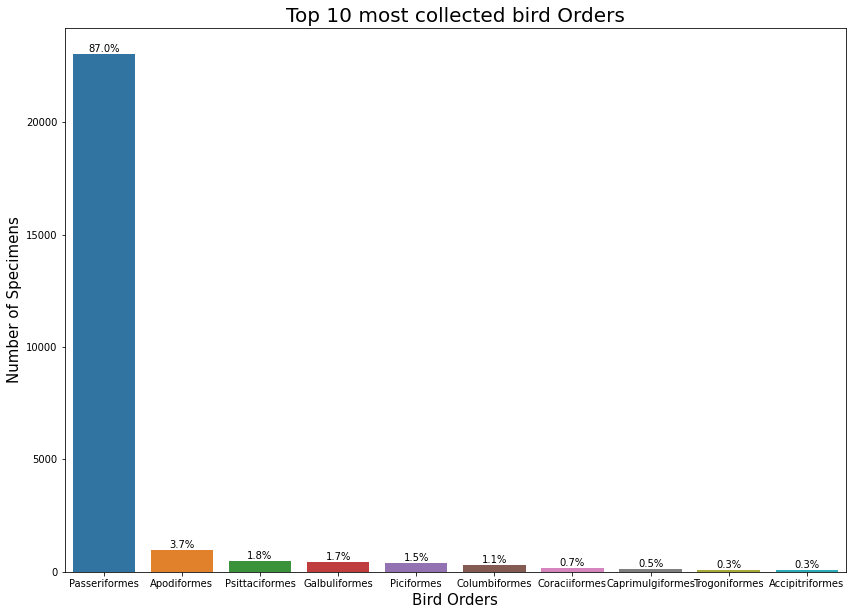

In [1535]:
plt.figure(figsize=(14, 10))
ax = sns.countplot(x=data_clean['ORDEM'],order=data_clean['ORDEM'].value_counts(10).iloc[0:10].index,palette='tab10')
plt.title('Top 10 most collected bird Orders',fontsize=20)
plt.xlabel('Bird Orders',fontsize=15)
plt.ylabel('Number of Specimens',fontsize=15)

add_perc(ax,data_clean['ORDEM'])


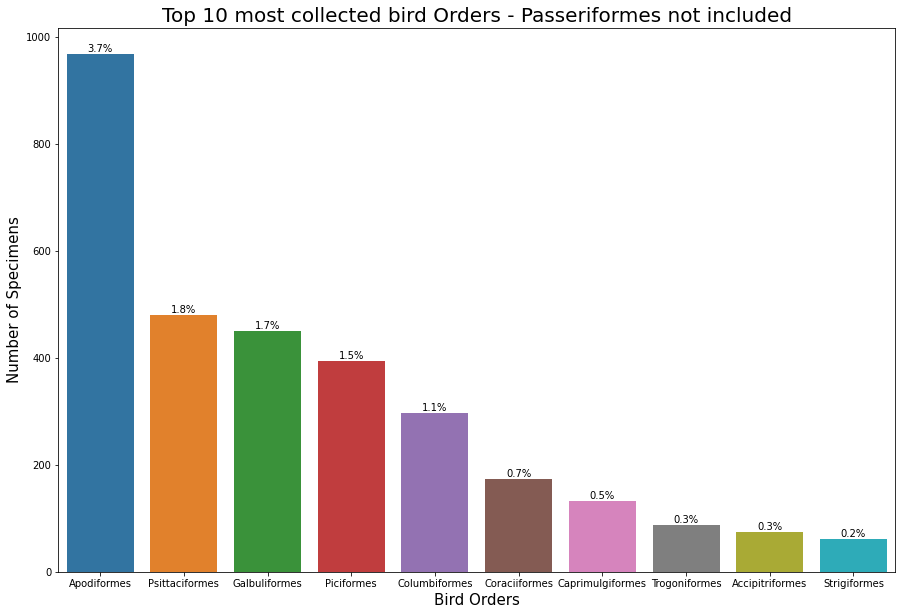

In [1427]:
plt.figure(figsize=(15, 10))
ax = sns.countplot(x=data_clean['ORDEM'],order=data_clean['ORDEM'].value_counts(10).iloc[1:11].index,palette='tab10')
plt.title('Top 10 most collected bird Orders - Passeriformes not included',fontsize=20)
plt.xlabel('Bird Orders',fontsize=15)
plt.ylabel('Number of Specimens',fontsize=15)

add_perc(ax,data_clean['ORDEM'])

### FAMILY

In [1536]:
print(f"Total number of Bird Families in the collection: {len(data_clean[~data_clean['FAMÍLIA'].isnull()]['FAMÍLIA'].unique())}")

Total number of Bird Families in the collection: 76


In [1537]:
# A list of the bird Families present in the collection, number of specimens and representativeness
family_accounting = pd.DataFrame({'Number of Specimens':data_clean['FAMÍLIA'].value_counts().values,'Percentage':(data_clean['FAMÍLIA'].value_counts()/data_clean['FAMÍLIA'].value_counts().sum())*100})
family_accounting

,Number of Specimens,Percentage
Thamnophilidae,8285,31.284220
Pipridae,3874,14.628252
Dendrocolaptidae,3349,12.645848
Tyrannidae,1284,4.848393
Thraupidae,1235,4.663369
Rhynchocyclidae,1036,3.911944
Trochilidae,958,3.617415
Furnariidae,665,2.511045
Psittacidae,480,1.812483
Turdidae,474,1.789827


In [1444]:
family_accounting.to_csv('results/family_accounting.csv')

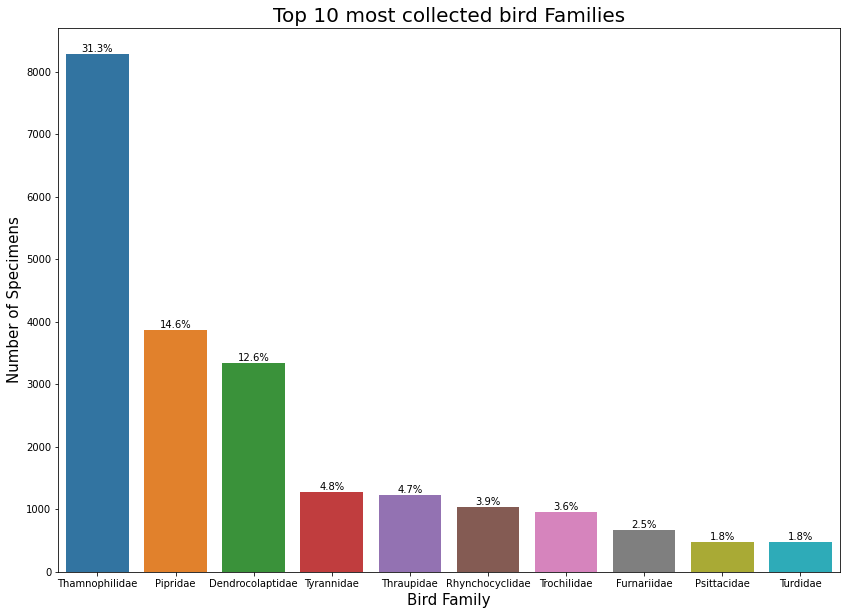

In [1538]:
plt.figure(figsize=(14, 10))
ax = sns.countplot(x=data_clean['FAMÍLIA'],order=data_clean['FAMÍLIA'].value_counts(10).iloc[0:10].index,palette='tab10')
plt.title('Top 10 most collected bird Families',fontsize=20)
plt.xlabel('Bird Family',fontsize=15)
plt.ylabel('Number of Specimens',fontsize=15)

add_perc(ax,data_clean['FAMÍLIA'])

In [1539]:
least_collected_families = data_clean['FAMÍLIA'].value_counts().loc[lambda x : x<5].to_frame().reset_index().set_axis(['Family','Samples'],axis=1).sort_values(by=['Samples','Family'])
least_collected_families

,Family,Samples
11,Laridae,1
13,Oxyruncidae,1
14,Recurvirostridae,1
12,Threskiornithidae,1
6,Anhimidae,2
9,Anhingidae,2
8,Aramidae,2
10,Jacanidae,2
7,Pandionidae,2
5,Sternidae,2


In [1605]:
least_collected_families.to_csv('results/least_collected_families.csv')

#### GENUS

In [1472]:
print(f"Total number of Bird Genera in the collection: {len(data_clean[~data_clean['GÊNERO'].isnull()]['GÊNERO'].unique())}")

Total number of Bird Genera in the collection: 444


In [187]:
# A list of the Genera present in the collection, number of specimens and representativeness
genus_accounting = pd.DataFrame({'Number of Specimens':data_clean['GÊNERO'].value_counts().values,'Percentage':(data_clean['GÊNERO'].value_counts()/data_clean['GÊNERO'].value_counts().sum())*100})
genus_accounting

,Number of Specimens,Percentage
Glyphorynchus,1301,4.911287
Dixiphia,1069,4.035485
Lepidothrix,1005,3.793884
Myrmotherula,979,3.695734
Willisornis,861,3.250283
...,...,...
Syrigma,1,0.003775
Arundinicola,1,0.003775
Zebrilus,1,0.003775
Lochmias,1,0.003775


In [1446]:
genus_accounting.to_csv('results/genus_accounting.csv')

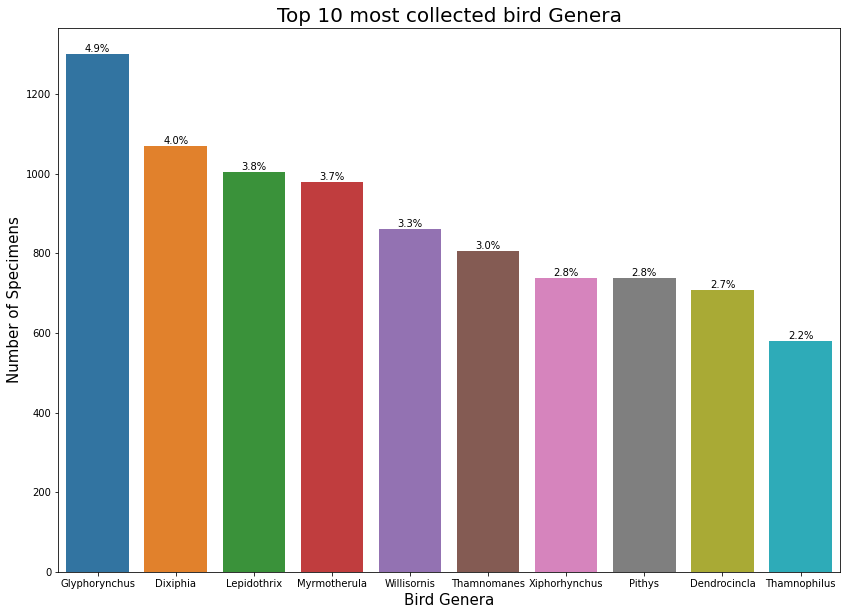

In [1556]:
plt.figure(figsize=(14, 10))
ax = sns.countplot(x=data_clean['GÊNERO'],order=data_clean['GÊNERO'].value_counts(10).iloc[0:10].index,palette='tab10')
plt.title('Top 10 most collected bird Genera',fontsize=20)
plt.xlabel('Bird Genera',fontsize=15)
plt.ylabel('Number of Specimens',fontsize=15)

add_perc(ax,data_clean['GÊNERO'])

In [1541]:
pd.set_option("display.max_rows", None)
least_collected_genera = data_clean['GÊNERO'].value_counts().loc[lambda x : x<5].to_frame().reset_index().set_axis(['Genus','Samples'],axis=1).sort_values(by=['Samples','Genus'])

In [474]:
least_collected_genera.to_csv('./results/least_collected_genera.csv')

#### SPECIES 

** Many taxa are not fully Identified (cf. or sp.) or identified at the subspecies level. I will process that first to eliminate those problems **

In [191]:
# Delete records with cf. and sp.
species_full = data_clean[(~data_clean['GÊNERO ESPÉCIE'].str.contains('sp.',regex=False) == True) & (~data_clean['GÊNERO ESPÉCIE'].str.contains('cf.',regex=False) == True)]

In [192]:
species_full

,No TEC.,Nome preparador,ORDEM,FAMÍLIA,GÊNERO,ESPÉCIE,GÊNERO ESPÉCIE,SEXO,EST,LOCALIDADE,...,GUIA N°.1,PARA.1,EMPRESTADO.2,DATA.2,GUIA N°.2,PARA.2,EMPRESTADO.3,DATA.3,GUIA N°.3,PARA.3
0,INPA A 001,Mario Cohn-Haft,Passeriformes,Tyrannidae,Elaenia,parvirostris,Elaenia parvirostris,F,AM,"ca 60 km ENE Tabatinga, margem direita Rio Sol...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,INPA A 002,Luciano Nicolás Naka,Piciformes,Capitonidae,Capito,aurovirens,Capito aurovirens,M,AM,"ca 60 km ENE Tabatinga, margem direita Rio Sol...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,INPA A 003,Alexandre Mendes Fernandes,Galbuliformes,Galbulidae,Galbalcyrhynchus,leucotis,Galbalcyrhynchus leucotis,F,AM,"ca 60 km ENE Tabatinga, margem direita Rio Sol...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,INPA A 004,Mario Cohn-Haft,Passeriformes,Thamnophilidae,Hypocnemoides,maculicauda,Hypocnemoides maculicauda,M,AM,"ca 60 km ENE Tabatinga, margem direita Rio Sol...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,INPA A 005,Luciano Nicolás Naka,Passeriformes,Troglodytidae,Pheugopedius,genibarbis,Pheugopedius genibarbis,M,AM,"Boca rio Jandietuba, ca 12 km E São Paulo de O...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28264,INPA A 28270,Thiago Orsi Laranjeiras,Passeriformes,Furnariidae,Syndactyla,roraimae,Syndactyla roraimae,NaN,RR,Parque Nacional Monte Roraima; Serra do Sol “B...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28265,INPA A 28271,Luciano Nicolás Naka,Passeriformes,Parulidae,Myiothlypis,bivittata,Myiothlypis bivittata,NaN,RR,Parque Nacional Monte Roraima; Serra do Sol “B...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28266,INPA A 28272,Mario Cohn-Haft,Passeriformes,Furnariidae,Syndactyla,roraimae,Syndactyla roraimae,NaN,RR,Parque Nacional Monte Roraima; Serra do Sol “B...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28267,INPA A 28273,Thiago Orsi Laranjeiras,Passeriformes,Troglodytidae,Pheugopedius,coraya,Pheugopedius coraya,NaN,RR,Parque Nacional Monte Roraima; Serra do Sol “B...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [193]:
# See if it worked
pd.DataFrame({'Number of Specimens':species_full['GÊNERO ESPÉCIE'].value_counts().values,'Percentage':(species_full['GÊNERO ESPÉCIE'].value_counts()/species_full['GÊNERO ESPÉCIE'].value_counts().sum())*100})

,Number of Specimens,Percentage
Glyphorynchus spirurus,1301,4.965838
Dixiphia pipra,1068,4.076491
Willisornis poecilinotus,856,3.267300
Pithys albifrons,738,2.816901
Xenopipo atronitens,527,2.011527
...,...,...
Nonnula sclateri,1,0.003817
Geranoaetus melanoleucus,1,0.003817
Grallaricula nana,1,0.003817
Diglossa duidae,1,0.003817


In [194]:
#Clean species with more than two names, ex: subspecies
species_full['species_clean'] = species_full['GÊNERO ESPÉCIE'].str.split().str[0] + ' ' + species_full['GÊNERO ESPÉCIE'].str.split().str[1]

<ipython-input-194-882d10b3dcab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  species_full['species_clean'] = species_full['GÊNERO ESPÉCIE'].str.split().str[0] + ' ' + species_full['GÊNERO ESPÉCIE'].str.split().str[1]


In [195]:
species_accounting = pd.DataFrame({'Number of Specimens':species_full['species_clean'].value_counts().values,'Percentage':(species_full['species_clean'].value_counts()/species_full['species_clean'].value_counts().sum())*100})
species_accounting = species_accounting.rename_axis('Species').sort_values(by=['Number of Specimens', 'Species'],ascending=[False,True])
species_accounting

,Number of Specimens,Percentage
Species,,
Glyphorynchus spirurus,1301,4.966407
Dixiphia pipra,1068,4.076958
Willisornis poecilinotus,856,3.267674
Pithys albifrons,738,2.817224
Xenopipo atronitens,527,2.011758
...,...,...
Xiphorhynchus kienerii,1,0.003817
Xiphorynchus pardalotus,1,0.003817
Zebrilus undulatus,1,0.003817


In [1599]:
print(f"Total number of Bird Species in the collection: {len(species_accounting)}")

Total number of Bird Species in the collection: 956


In [1600]:
species_accounting.to_csv('results/species_accounting.csv')

** Let's try a first attempt to produce a list of amazonian birds. For that I'll filter species with records that fell into the polygons of the areas of endemism. Although this should be a pretty good guess, a few records failed to be  labeled during the GIS analyses, while others might be inside the polygon but are possible non amazonian because they might be in fragments of savanah inside the polygons or something else like that **

In [196]:
amazonian_species_polygon_based = species_full[~species_full['area_endemism'].isnull()]['species_clean'].value_counts()
amazonian_species_polygon_based = pd.DataFrame({'Species':amazonian_species_polygon_based.index,'Number of Specimens':amazonian_species_polygon_based.values})
amazonian_species_polygon_based

,Species,Number of Specimens
0,Glyphorynchus spirurus,1297
1,Dixiphia pipra,1067
2,Willisornis poecilinotus,855
3,Pithys albifrons,735
4,Lepidothrix coronata,523
...,...,...
922,Ammodramus humeralis,1
923,Atticora tibialis,1
924,Todirostrum poliocephalum,1
925,Himantopus mexicanus,1


In [1867]:
print(f"Total number of Amazonian Bird Species in the collection: {len(amazonian_species_polygon_based)}")

Total number of Bird Species in the collection: 927


In [1633]:
amazonian_species_polygon_based.to_csv('results/amazonian_species_based_on_polygon.csv')

In [1602]:
least_collected_species = species_full['species_clean'].value_counts().loc[lambda x : x<5].to_frame().reset_index().set_axis(['Species','Samples'],axis=1).sort_values(by=['Samples','Species'])
least_collected_species

,Species,Samples
295,Accipiter striatus,1
418,Actitis macularius,1
445,Amazilia brevirostris,1
328,Amazona amazonica,1
437,Amazona coerulescens,1
365,Amazona farinosa,1
325,Ammodramus humeralis,1
307,Antrostomus sericocaudatus,1
353,Anurolimnas castaneiceps,1
344,Ara chloropterus,1


In [1603]:
least_collected_species.to_csv('results/least_collected_species.csv')

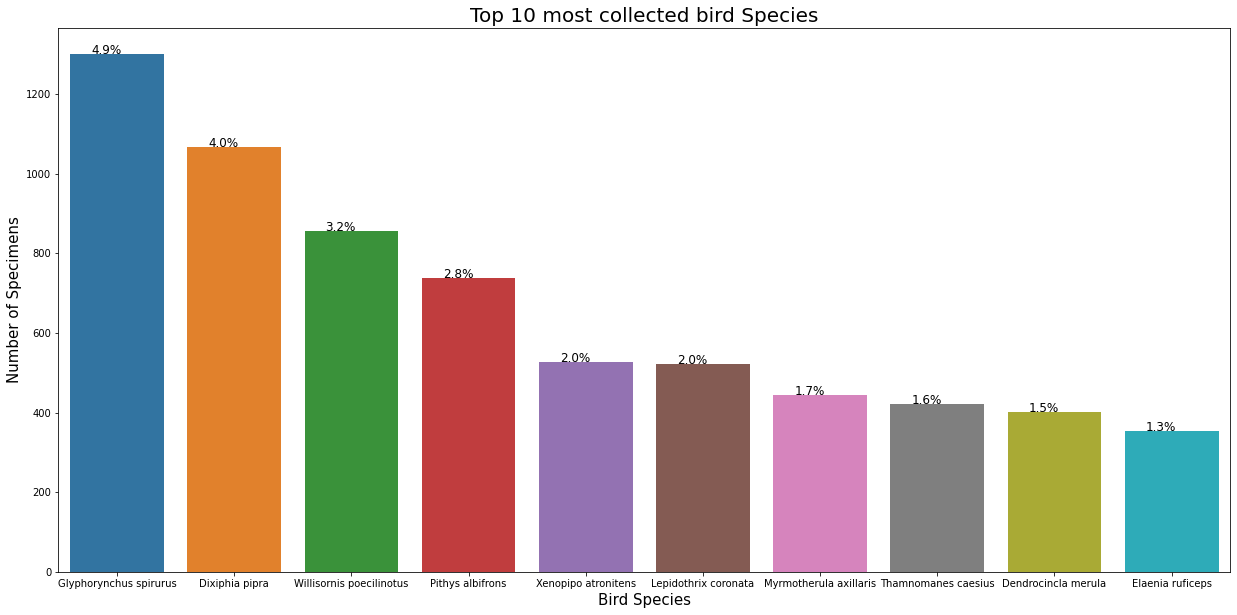

In [276]:
plt.figure(figsize=(21, 10))
ax = sns.countplot(x=data_clean['GÊNERO ESPÉCIE'],order=data_clean['GÊNERO ESPÉCIE'].value_counts(10).iloc[0:10].index,palette='tab10')
plt.title('Top 10 most collected bird Species',fontsize=20)
plt.xlabel('Bird Species',fontsize=15)
plt.ylabel('Number of Specimens',fontsize=15)

bar_percentage(ax,data_clean['GÊNERO ESPÉCIE'])

### Sex

* What proportion of samples are males and females?

In [495]:
least_collected_species = data_clean['GÊNERO ESPÉCIE'].value_counts().loc[lambda x : x<5].to_frame().reset_index().set_axis(['Species','Samples'],axis=1).sort_values(by=['Samples','Species'])
least_collected_species

,Species,Samples
437,Accipiter striatus,1
554,Actitis macularius,1
374,Amazilia brevirostris,1
488,Amazona amazonica,1
396,Amazona coerulescens,1
541,Amazona farinosa,1
559,Ammodramus humeralis,1
515,Antrostomus sericocaudatus,1
350,Anurolimnas castaneiceps,1
568,Ara chloropterus,1


In [496]:
# I will exclude samples which are not fully identified, which are the ones contain the suffixes sp. and cf.
least_collected_species[(~least_collected_species.Species.str.contains('sp.') == True) & (~least_collected_species.Species.str.contains('cf.') == True)]

,Species,Samples
437,Accipiter striatus,1
554,Actitis macularius,1
374,Amazilia brevirostris,1
488,Amazona amazonica,1
396,Amazona coerulescens,1
541,Amazona farinosa,1
559,Ammodramus humeralis,1
515,Antrostomus sericocaudatus,1
350,Anurolimnas castaneiceps,1
568,Ara chloropterus,1


In [492]:
least_collected_species.to_csv('./results/least_collected_species.csv')

In [1395]:
data_sex = data_clean[(data_clean['SEXO'] == 'M')| (data_clean['SEXO'] == 'F')]

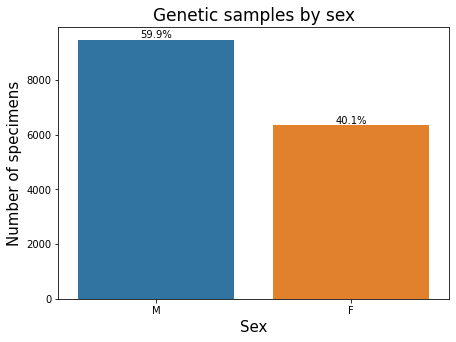

In [1396]:
plt.figure(figsize=(7, 5))
ax = sns.countplot(x=data_sex['SEXO'],order=data_sex['SEXO'].value_counts().index)
plt.title('Genetic samples by sex',fontsize=17)
plt.xlabel('Sex',fontsize=15)
plt.ylabel('Number of specimens',fontsize=15)

add_perc(ax,data_sex['SEXO'])



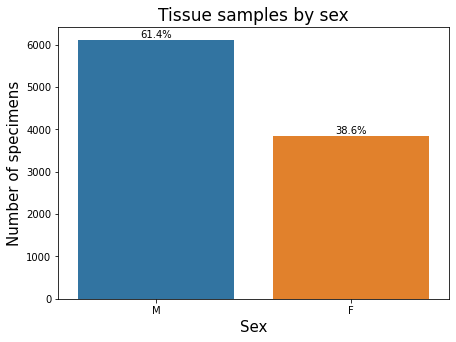

In [1397]:
#Filtering by tissue samples
plt.figure(figsize=(7, 5))
ax = sns.countplot(x=data_sex[data_sex['MÚSCULO'] == 'X']['SEXO'],order=data_sex[data_sex['MÚSCULO'] == 'X']['SEXO'].value_counts().index)
plt.title('Tissue samples by sex',fontsize=17)
plt.xlabel('Sex',fontsize=15)
plt.ylabel('Number of specimens',fontsize=15)

add_perc(ax,data_sex[data_sex['MÚSCULO'] == 'X']['SEXO'])

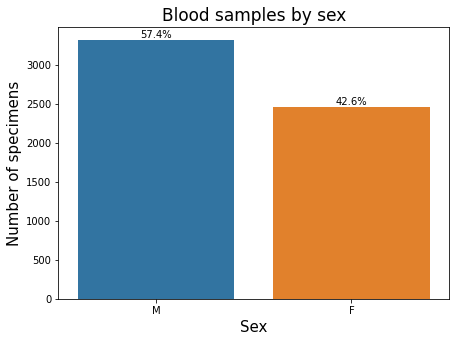

In [1398]:
#Filtering by blood samples
plt.figure(figsize=(7, 5))
ax = sns.countplot(x=data_sex[data_sex['SANGUE'] == 'X']['SEXO'],order=data_sex[data_sex['SANGUE'] == 'X']['SEXO'].value_counts().index)
plt.title('Blood samples by sex',fontsize=17)
plt.xlabel('Sex',fontsize=15)
plt.ylabel('Number of specimens',fontsize=15)

add_perc(ax,data_sex[data_sex['SANGUE'] == 'X']['SEXO'])

In [1399]:
data_sex['MÉTODO DE COLETA'].value_counts()

Rede de neblina                            11491
Tiro                                        1570
Encontrado morto                              98
Indivíduo não coletado, apenas anilhado       97
Achado morto                                  22
tiro                                          21
Manual                                        16
Enc. Morto                                    12
Bateu na janela                               10
Morreu na Rede de neblina                      9
Acidente                                       8
Armadilha                                      8
Atropelado                                     7
Enc. morto                                     7
Encontrado morto na rua                        3
Colisão aeronave                               3
Sacrificado                                    3
Atropelamento                                  3
Baladeira                                      3
Colisão com aeronave                           2
Atropelado, aeronave

___
**We can see that most samples are males, two hypothesis are likely to explain that**

1) **Males are more conspicuous (colorful) than females:** That could be corroborated if males were more collected by shot than females. However, this should not, or would not necessary, hold for specimens collected by mistnest because this method doesn't select target by visual instincts. 

2) **Males move around more than females**: thus they are more likely to fall into the mistnets. In some bird families however, females move around more to look for reproducing arenas (leks) composed only by males. If that is true, then we should see the opposite pattern for these families.

3) **Females are less conspicous than males**: So they are not being properly identified during the labeling process of samples. In this hypothesis this bias is a mere lack of precision in identifying the samples' sex and not a real pattern.

* **Let's test Hypothesis 1**

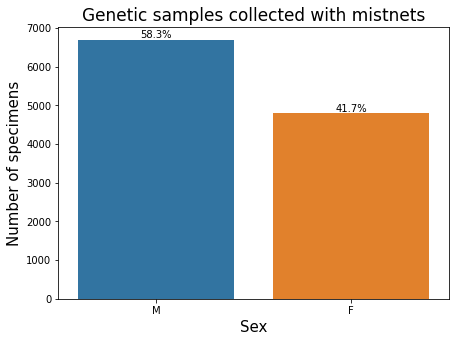

In [1400]:
#Filtering by method of collecting, mistnets
plt.figure(figsize=(7, 5))
ax = sns.countplot(x=data_sex[data_sex['MÉTODO DE COLETA'] == 'Rede de neblina']['SEXO'],order=data_sex[data_sex['MÉTODO DE COLETA'] == 'Rede de neblina']['SEXO'].value_counts().index)
plt.title('Genetic samples collected with mistnets',fontsize=17)
plt.xlabel('Sex',fontsize=15)
plt.ylabel('Number of specimens',fontsize=15)

add_perc(ax,data_sex[data_sex['MÉTODO DE COLETA'] == 'Rede de neblina']['SEXO'])


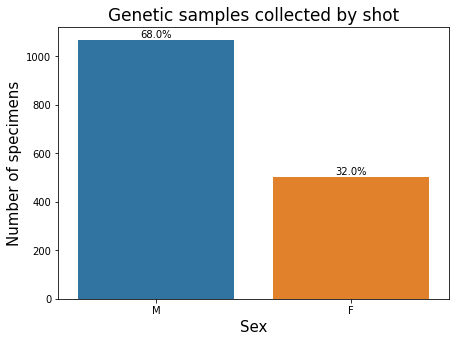

In [1401]:
#Filtering by method of collecting, shot
plt.figure(figsize=(7, 5))
ax = sns.countplot(x=data_sex[data_sex['MÉTODO DE COLETA'] == 'Tiro']['SEXO'],order=data_sex[data_sex['MÉTODO DE COLETA'] == 'Tiro']['SEXO'].value_counts().index)
plt.title('Genetic samples collected by shot',fontsize=17)
plt.xlabel('Sex',fontsize=15)
plt.ylabel('Number of specimens',fontsize=15)

add_perc(ax,data_sex[data_sex['MÉTODO DE COLETA'] == 'Tiro']['SEXO'])


**Hypothesis 1**: The difference among sex in specimens collected by shot is much more pronouced than in samples collected by mistnets which corroborates hypothesis 1. However we still have a big difference in samples collected by mistnets

* **Let's test hypothesis 2**

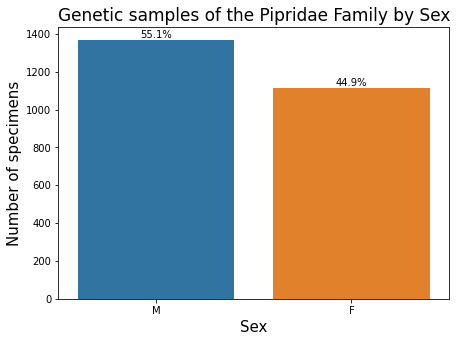

In [1402]:
plt.figure(figsize=(7, 5))
ax = sns.countplot(x=data_sex[data_sex['FAMÍLIA'] == 'Pipridae']['SEXO'])
plt.title('Genetic samples of the Pipridae Family by Sex',fontsize=17)
plt.xlabel('Sex',fontsize=15)
plt.ylabel('Number of specimens',fontsize=15)

add_perc(ax,data_sex[data_sex['FAMÍLIA'] == 'Pipridae']['SEXO'])



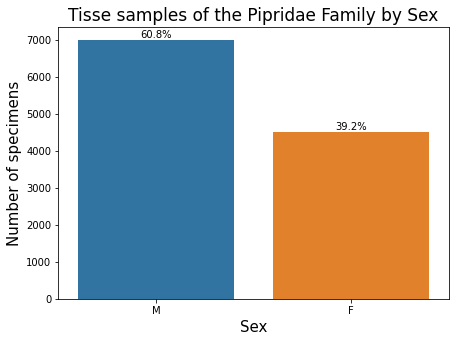

In [1403]:
plt.figure(figsize=(7, 5))
ax = sns.countplot(x=data_sex[(data_sex['FAMÍLIA'] == 'Pipridae') | (data_sex['MÚSCULO'] == 'X')]['SEXO'],order=data_sex[(data_sex['FAMÍLIA'] == 'Pipridae') | (data_sex['MÚSCULO'] == 'X')]['SEXO'].value_counts().index)
plt.title('Tisse samples of the Pipridae Family by Sex',fontsize=17)
plt.xlabel('Sex',fontsize=15)
plt.ylabel('Number of specimens',fontsize=15)

add_perc(ax,data_sex[(data_sex['FAMÍLIA'] == 'Pipridae') | (data_sex['MÚSCULO'] == 'X')]['SEXO'])

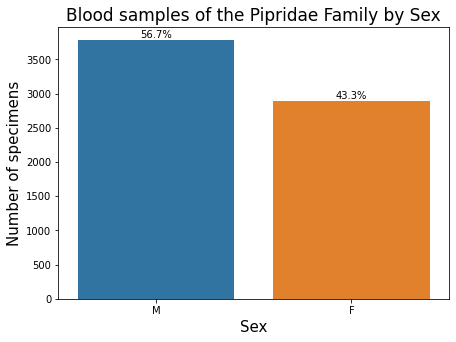

In [1404]:
plt.figure(figsize=(7, 5))
ax = sns.countplot(x=data_sex[(data_sex['FAMÍLIA'] == 'Pipridae') | (data_sex['SANGUE'] == 'X')]['SEXO'])
plt.title('Blood samples of the Pipridae Family by Sex',fontsize=17)
plt.xlabel('Sex',fontsize=15)
plt.ylabel('Number of specimens',fontsize=15)

add_perc(ax,data_sex[(data_sex['FAMÍLIA'] == 'Pipridae') | (data_sex['SANGUE'] == 'X')]['SEXO'])


**Hypothesis** 2 could not be corroborated as the pattern also holds for the Pipridae Family

* **Hypothesis 3** is much harder to test. We could compare the distribution of tissue and blood samples. Tissue samples are usually skin specimens which are identified based on gonads and does not rely on counspicouness of pluamge coloration. Thus we would expect that the difference is greater in blood than in tissue samples. That was not what we previously saw which does not corroborate H3 (see graph below). Maybe males are naturally more abundant?? Interesting question!

** Let's make a good summary graph by sex **

In [1405]:
sample_type_sexo = data_clean[(data_clean['SEXO'] == 'M') | (data_clean['SEXO'] == 'F')][['MÚSCULO','SANGUE','SEXO']]
df = sample_type_sexo.groupby('SEXO').count().reset_index()
tidy = df.melt(id_vars='SEXO').rename(columns=str.title)
tidy

,Sexo,Variable,Value
0,F,MÚSCULO,3843
1,M,MÚSCULO,6110
2,F,SANGUE,2464
3,M,SANGUE,3318


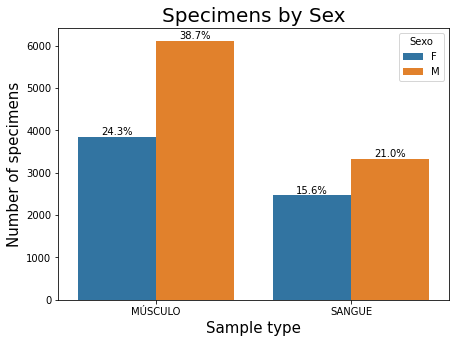

In [1406]:
plt.figure(figsize=(7, 5))
ax = sns.barplot(data=tidy,x='Variable', y='Value',hue='Sexo')
plt.title('Specimens by Sex',fontsize=20)
plt.xlabel('Sample type',fontsize=15)
plt.ylabel('Number of specimens',fontsize=15)

add_perc(ax,sample_type_sexo)


### Specimens per Area

#### State

In [1630]:
specimens_per_state = pd.DataFrame({'Number of specimens':data_clean['EST'].value_counts(),'Proportion':(data_clean['EST'].value_counts()/data_clean['EST'].value_counts().sum())*100})
specimens_per_state

,Number of specimens,Proportion
AM,16458,62.511395
PA,4833,18.356882
RR,2296,8.720754
RO,1507,5.723944
AC,441,1.675023
MT,347,1.317988
CE,281,1.067305
SC,100,0.379824
AP,56,0.212701
MG,4,0.015193


In [1632]:
specimens_per_state.to_csv('results/specimens_per_state.csv')

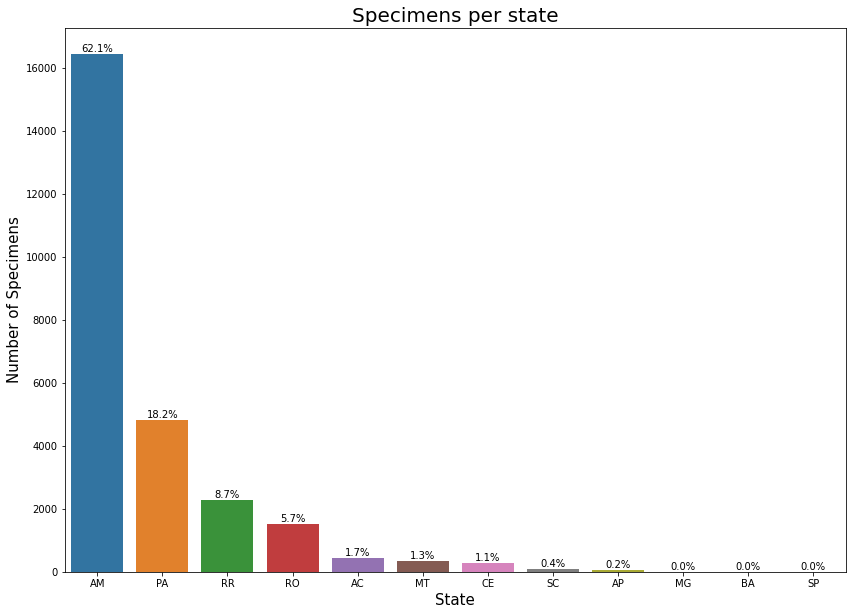

In [699]:
plt.figure(figsize=(14, 10))
ax = sns.countplot(x=data_clean['EST'],order=data_clean['EST'].value_counts().iloc[0:12].index,palette='tab10')
plt.title('Specimens per state',fontsize=20)
plt.xlabel('State',fontsize=15)
plt.ylabel('Number of Specimens',fontsize=15)

add_perc(ax,data_clean['EST'])

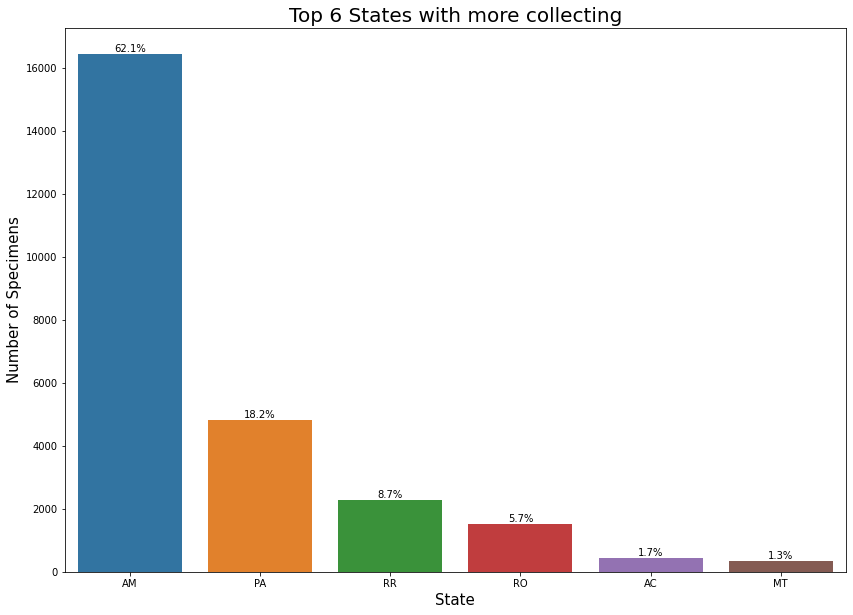

In [700]:
plt.figure(figsize=(14, 10))
ax = sns.countplot(x=data_clean['EST'],order=data_clean['EST'].value_counts().iloc[0:6].index,palette='tab10')
plt.title('Top 6 States with more collecting',fontsize=20)
plt.xlabel('State',fontsize=15)
plt.ylabel('Number of Specimens',fontsize=15)

add_perc(ax,data_clean['EST'])

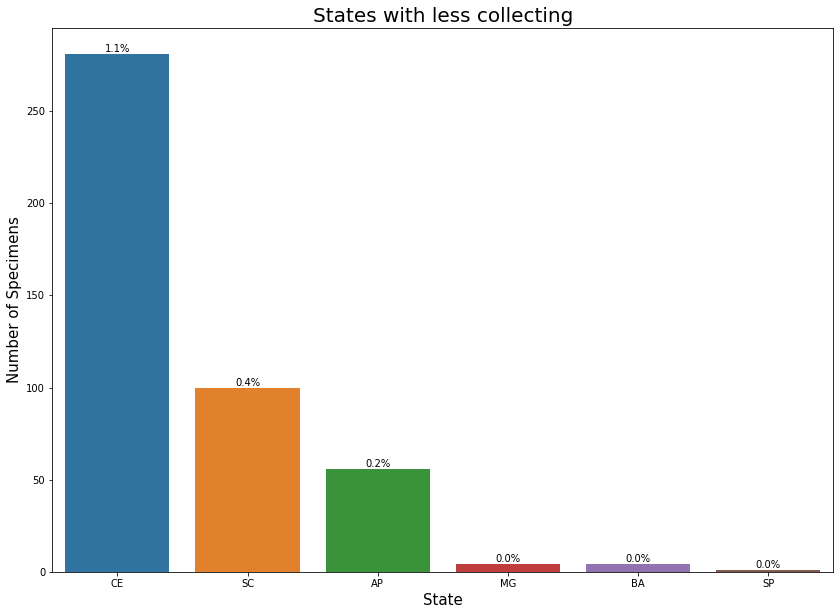

In [701]:
plt.figure(figsize=(14, 10))
ax = sns.countplot(x=data_clean['EST'],order=data_clean['EST'].value_counts(10).iloc[-6:].index,palette='tab10')
plt.title('States with less collecting',fontsize=20)
plt.xlabel('State',fontsize=15)
plt.ylabel('Number of Specimens',fontsize=15)

add_perc(ax,data_clean['EST'])

# plt.figure(figsize=(25, 15))
# sns.countplot(x=data_clean['EST'],order=data_clean['EST'].value_counts(10).iloc[-6:].index,palette='tab10')

#### Specimens per Area of Endemism 

In [1634]:
specimens_per_AE = pd.DataFrame({'Number of specimens':data_clean['area_endemism'].value_counts(),'Proportion':(data_clean['area_endemism'].value_counts()/data_clean['area_endemism'].value_counts().sum())*100})
specimens_per_AE

,Number of specimens,Proportion
Guiana,11283,43.636153
Inambari,4873,18.845960
Rondonia,3618,13.992342
Imeri,3255,12.588467
Tapajos,2328,9.003365
Napo,352,1.361333
Xingu,148,0.572379


In [1635]:
specimens_per_AE.to_csv('results/specimen_per_ae.csv')

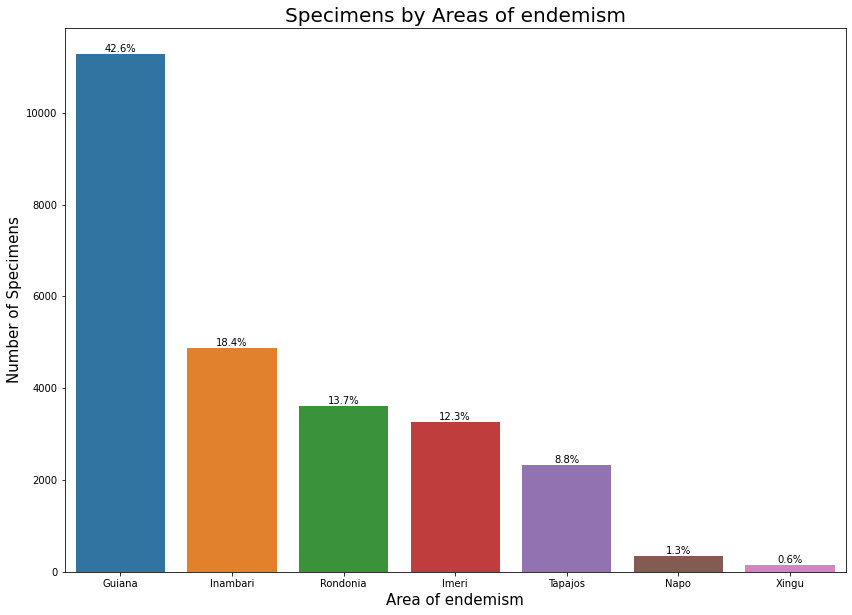

In [1416]:
plt.figure(figsize=(14, 10))
ax = sns.countplot(x=data_clean['area_endemism'],order=data_clean['area_endemism'].value_counts().iloc[:10].index,palette='tab10')
plt.title('Specimens by Areas of endemism',fontsize=20)
plt.xlabel('Area of endemism',fontsize=15)
plt.ylabel('Number of Specimens',fontsize=15)

add_perc(ax,data_clean['area_endemism'])

## Contributors

> Many researches have worked at INPA and contributed with hard work and sweat in field trips to collect all the samples.

> Let's see some of the top contributor so we can acklowledge everyone's work

### Top Collectors and Taxidermists

#### General collectors 

In [1407]:
top10_collectors = data_clean['Nome preparador'].value_counts().head(10)
top10_collectors

Gisiane Rodrigues Lima            2761
Juliana Menger                    2037
Cristiane Dreves                  1283
Carolina Schuch de Oliveira       1210
Cassiano Gatto e Roberta Boss      964
Sebastião Carlos Pereira           940
Mateus Ferreira                    910
Mônica S Ribas/Roberta L. Boss     907
Marcelo Barreiros                  902
Jared Wolfe                        676
Name: Nome preparador, dtype: int64

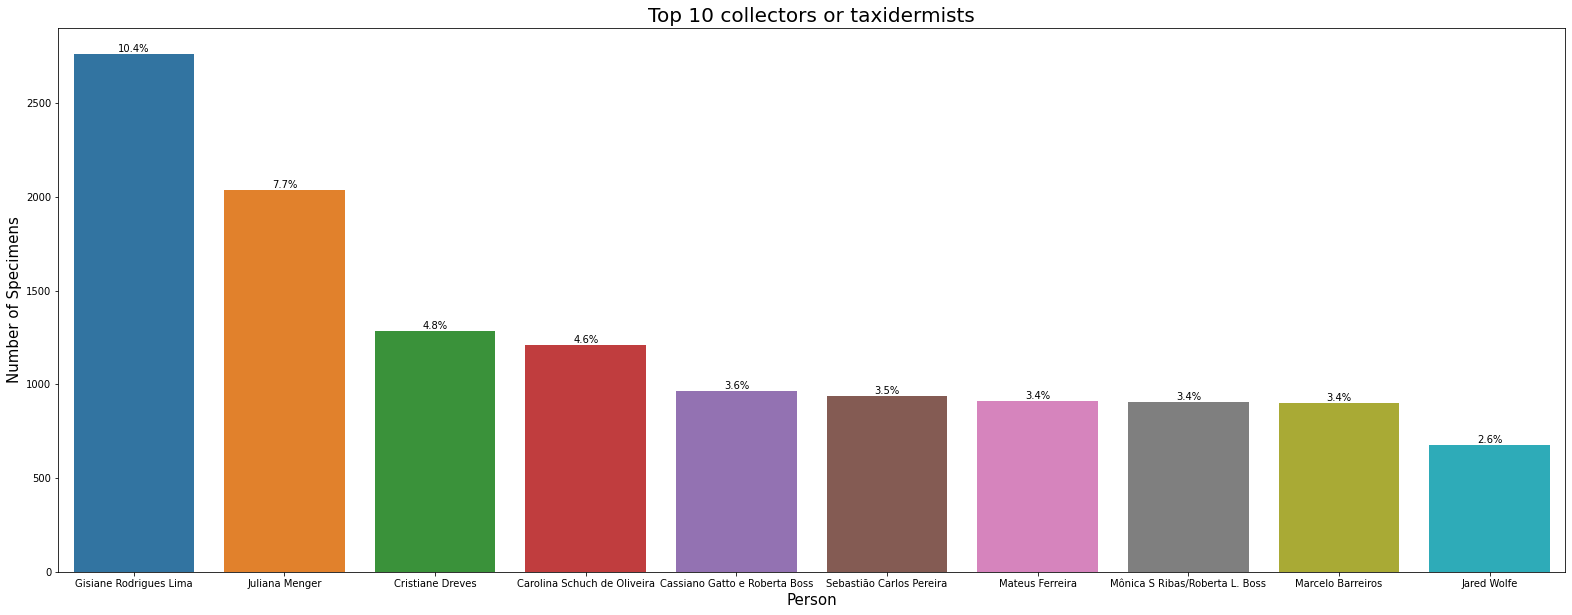

In [1408]:
plt.figure(figsize=(27, 10))
ax = sns.countplot(x=data_clean['Nome preparador'],order=data_clean['Nome preparador'].value_counts().iloc[0:10].index,palette='tab10')
plt.title('Top 10 collectors or taxidermists',fontsize=20)
plt.xlabel('Person',fontsize=15)
plt.ylabel('Number of Specimens',fontsize=15)

add_perc(ax,data_clean['Nome preparador'])

** I can see that we have blood collector and taxidermists together in the same group which is not ideally. Each column should contain only one type of information. I'll break them a part by filtering by tissue samples which will represent taxidermist and blood samples which will represent blood collectors. Unfortunately it is not possible to retrieve a rank of General collectors due to limitations of the data. Maybe in the future by crossing the skins specimen and genetic resources databases **

##### Top taxidermists

In [1409]:
top_taxidermists = pd.DataFrame({'Specimens':data_clean[data_clean['MÚSCULO'] == 'X']['Nome preparador'].value_counts().head(10)})
top_taxidermists.index.name = 'Name'
top_taxidermists

,Specimens
Name,
Gisiane Rodrigues Lima,2744
Cristiane Dreves,1283
Sebastião Carlos Pereira,940
Mateus Ferreira,881
Paulo César Balduíno,666
Stephane dos Santos Pereira,626
"Camila Ribas, Fernando Horta, Renato Gaban",471
Elisama Franco Bezerra,391
Luciano Nicolás Naka,365


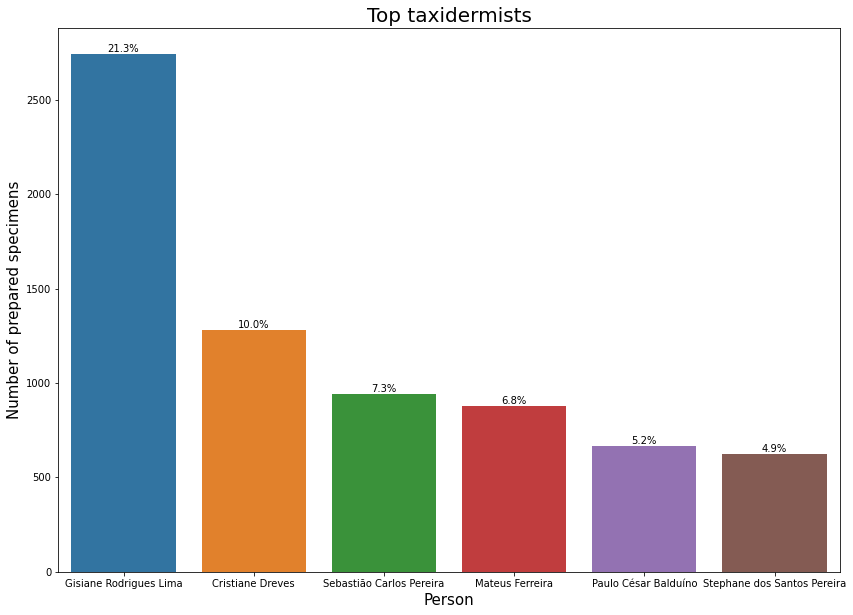

In [1410]:
plt.figure(figsize=(14, 10))
ax = sns.countplot(x=data_clean[data_clean['MÚSCULO'] == 'X']['Nome preparador'],order=data_clean[data_clean['MÚSCULO'] == 'X']['Nome preparador'].value_counts().iloc[0:6].index,palette='tab10')
plt.title('Top taxidermists',fontsize=20)
plt.xlabel('Person',fontsize=15)
plt.ylabel('Number of prepared specimens',fontsize=15)

add_perc(ax,data_clean[data_clean['MÚSCULO'] == 'X']['Nome preparador'])


#### Top blood collectors

In [1414]:
top_blood_collectors = pd.DataFrame({'Specimens':data_clean[data_clean['SANGUE'] == 'X']['Nome preparador'].value_counts().head(10)})
top_blood_collectors.index.name = 'Name'
top_blood_collectors

,Specimens
Name,
Juliana Menger,2035
Carolina Schuch de Oliveira,1210
Cassiano Gatto e Roberta Boss,964
Mônica S Ribas/Roberta L. Boss,907
Marcelo Barreiros,902
Jared Wolfe,676
Affonso Henrique,556
Sérgio Henrique Borges,476
Thiago Bicudo,469


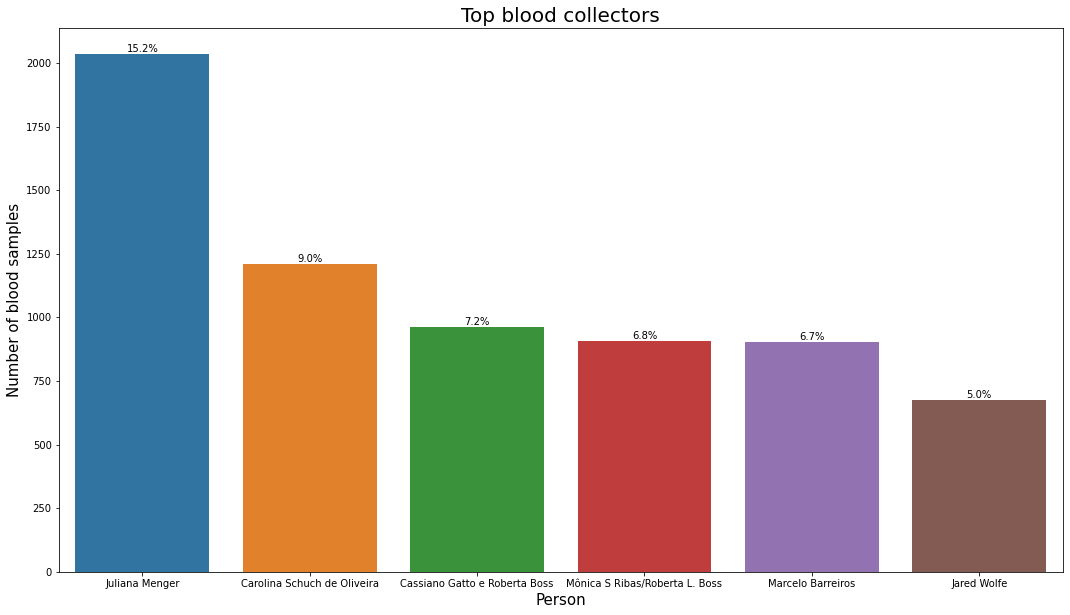

In [1412]:
plt.figure(figsize=(18, 10))
ax = sns.countplot(x=data_clean[data_clean['SANGUE'] == 'X']['Nome preparador'],order=data_clean[data_clean['SANGUE'] == 'X']['Nome preparador'].value_counts().iloc[0:6].index,palette='tab10')
plt.title('Top blood collectors',fontsize=20)
plt.xlabel('Person',fontsize=15)
plt.ylabel('Number of blood samples',fontsize=15)

add_perc(ax,data_clean[data_clean['SANGUE'] == 'X']['Nome preparador'])


## Evolution of the collection

> Things change, resources come and go, so does the number of specimens collected.

> Let's take a look of how collecting has evolved in the institution through time

### Temporal series

In [67]:
collect = pd.DataFrame(data_clean['DATA COLETA'].apply(pd.to_datetime,errors='coerce'))

In [68]:
collect = collect[collect['DATA COLETA'].isna() == False]

In [69]:
collect.head()

,DATA COLETA
0,2003-11-09
1,2003-11-09
2,2003-11-09
3,2003-11-09
4,2003-12-09


In [70]:
collect['year'] = pd.DataFrame(collect['DATA COLETA'].apply(lambda x: x.year))
collect.head()

,DATA COLETA,year
0,2003-11-09,2003
1,2003-11-09,2003
2,2003-11-09,2003
3,2003-11-09,2003
4,2003-12-09,2003


In [71]:
collect_year = collect.groupby(by='year').count()

In [72]:
collect_year.rename(columns={'DATA COLETA':'samples'},inplace=True)
collect_year.head()

,samples
year,
1996,1
1998,1
1999,6
2000,1
2001,14


In [73]:
collect_year.sort_values(by='samples',ascending=False)
collect_year.head()

,samples
year,
1996,1
1998,1
1999,6
2000,1
2001,14


#### Specimens collected by Year

Text(0.5, 0, 'Year')

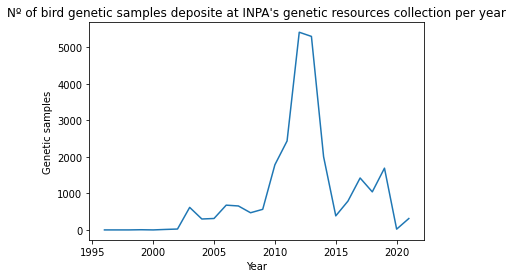

In [79]:
sns.lineplot(data=collect_year,x='year', y = 'samples')
plt.title("Nº of bird genetic samples deposite at INPA's genetic resources collection per year")
plt.ylabel("Genetic samples")
plt.xlabel("Year")

In [75]:
collect_year['cumsum'] = collect_year.samples.cumsum()
collect_year.head()

,samples,cumsum
year,,
1996,1,1
1998,1,2
1999,6,8
2000,1,9
2001,14,23


#### Collection growing

> Cumulative samples per year

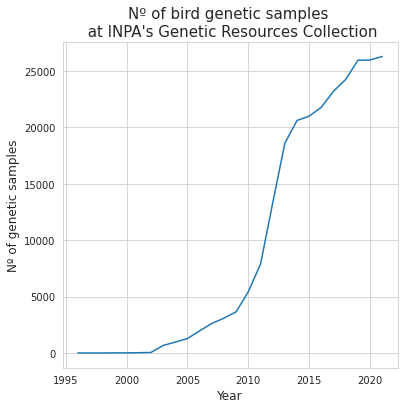

In [214]:
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(6, 6))
    sns.lineplot(data=collect_year,x='year', y = 'cumsum')
    plt.title("Nº of bird genetic samples \n at INPA's Genetic Resources Collection",fontsize=15)
    plt.xlabel("Year",fontsize=12)
    plt.ylabel("Nº of genetic samples",fontsize=12)
#     plt.savefig('../results/figures/cumulative_samples_through_time.pdf')

### Main Expeditions

In [96]:
db['EXPEDIÇÃO'].value_counts(ascending=False).head(10)

JSM Doutorado 2012       785
São Gabriel 2013 MPEG    767
Sisbiota Japurá 2014     612
BR 319 PRONEX 2012       611
LNN Doutorado            533
Solimões                 488
PDBFF CF 2013            486
Sisbiota Purus 2012      474
Balbina                  469
Tapajós GM 2013 IV       449
Name: EXPEDIÇÃO, dtype: int64

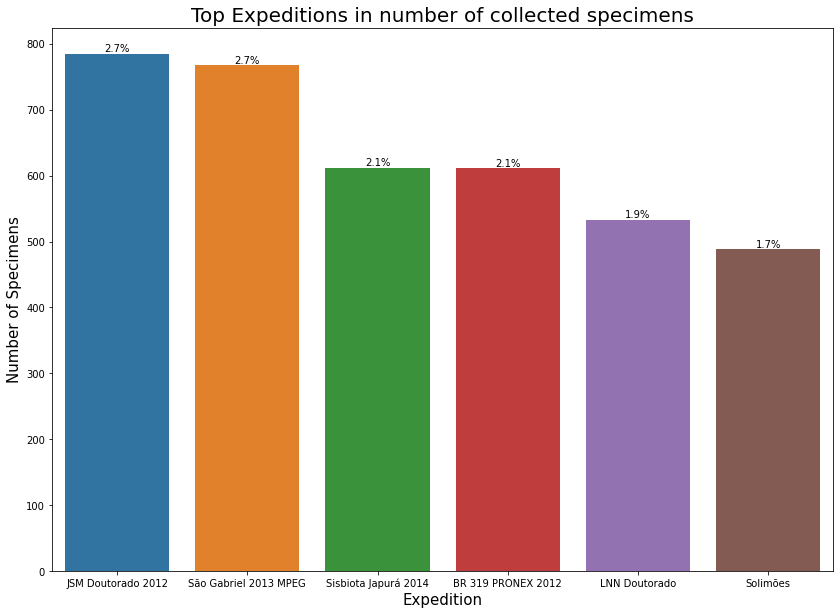

In [97]:
plt.figure(figsize=(14, 10))
ax = sns.countplot(x=db['EXPEDIÇÃO'],order=db['EXPEDIÇÃO'].value_counts().iloc[:6].index,palette='tab10')
plt.title('Top Expeditions in number of collected specimens',fontsize=20)
plt.xlabel('Expedition',fontsize=15)
plt.ylabel('Number of Specimens',fontsize=15)

add_perc(ax,db['EXPEDIÇÃO'])

## Tissue Loans

> ** One of the collection's main functions is to provide tissue loans/grants to other researchers so they can use samples in their studies. This is an important feature and we will take a look at those records. **

> ** However I can see that the records are split into two databases, one in our main spreadsheet and the other in a second spread. We'll combine them first and them perform some analyses **

In [135]:
loans = data_clean[['GUIA N°','PARA','DATA']].dropna().groupby('GUIA N°').first()
loans.sample(5)

,PARA,DATA
GUIA N°,,
20.0,Marina Anciães,23/10/2006
30.0,Curtis Marantz,18/07/2007
48.0,Camila Ribas/Mario Cohn-Haft,17/07/2009
41.0,Luciano Nicolas Naka,17/12/2008
31.0,Marina Anciães,08/10/2007


In [136]:
loans['number_specimen'] = data_clean[['GUIA N°','PARA','DATA']].dropna().groupby('GUIA N°').size()
loans.set_axis(['para','data','number_specimens'],axis=1,inplace=True)
loans.sample(5)

,para,data,number_specimens
GUIA N°,,,
25.0,Luciano Nicolas Naka,05/03/2007,259
23.0,Marina Anciães,01/12/2006,6
11.0,Alexandre Aleixo,28/10/2005,8
44.0,Marina Anciães,28/04/2009,31
50.0,Alexandre Mendes Fernandes,16/10/2009,19


In [137]:
loans_1 = data_clean[['GUIA N°.1','PARA.1','DATA.1']].dropna().groupby('GUIA N°.1').first()
loans_1['number_specimen'] = data_clean[['GUIA N°.1','PARA.1','DATA.1']].dropna().groupby('GUIA N°.1').size()
loans_1.set_axis(['para','data','number_specimens'],axis=1,inplace=True)
loans_1.sample(5)

,para,data,number_specimens
GUIA N°.1,,,
44.0,Marina Anciães,28/04/2009,42
48.0,Camila Ribas/Mario Cohn-Haft,17/07/2009,5
30.0,Curtis Marantz,18/07/2007,1
35.0,Marina Anciães,29/12/2007,1
41.0,Luciano Nicolas Naka,17/12/2008,14


In [138]:
loans_2 = data_clean[['GUIA N°.2','PARA.2','DATA.2']].dropna().groupby('GUIA N°.2').first()
loans_2['number_specimen'] = data_clean[['GUIA N°.2','PARA.2','DATA.2']].dropna().groupby('GUIA N°.2').size()
loans_2.set_axis(['para','data','number_specimens'],axis=1,inplace=True)
loans_2.sample(5)

,para,data,number_specimens
GUIA N°.2,,,
44.0,Marina Anciães,28/04/2009,9
41.0,Luciano Nicolas Naka,17/12/2008,1
36.0,Alexandre Mendes Fernandes,22/04/2008,2
61.0,Henrique Batalha Filho,26/11/2010,2
58.0,Carlos Eduardo Agne,27/05/2010,1


In [139]:
loans_3 = data_clean[['GUIA N°.3','PARA.3','DATA.3']].dropna().groupby('GUIA N°.3').first()
loans_3['number_specimen'] = data_clean[['GUIA N°.3','PARA.3','DATA.3']].dropna().groupby('GUIA N°.3').size()
loans_3.set_axis(['para','data','number_specimens'],axis=1,inplace=True)
loans_3.sample()

,para,data,number_specimens
GUIA N°.3,,,
53.0,Alexandre Mendes Fernandes,23/10/2009,2


In [140]:
loans_concat = pd.concat([loans,loans_1,loans_2,loans_3])

In [141]:
loans_concat.sample(5)

,para,data,number_specimens
41.0,Luciano Nicolas Naka,17/12/2008,61
3.0,Carla Haisler Sardelli,01/06/2004,10
58.0,Carlos Eduardo Agne,27/05/2010,1
44.0,Marina Anciães,28/04/2009,42
44.0,Marina Anciães,28/04/2009,9


In [142]:
loans_concat['institution'] = ['Instituto Nacional de Pesquisas da Amazonia','Instituto Nacional de Pesquisas da Amazonia','Instituto Nacional de Pesquisas da Amazonia','Instituto Nacional de Pesquisas da Amazonia','Museu Paraense Emilio Goeldi','Instituto Nacional de Pesquisas da Amazonia','Instituto Nacional de Pesquisas da Amazonia','Instituto Nacional de Pesquisas da Amazonia','Instituto Nacional de Pesquisas da Amazonia','Instituto Nacional de Pesquisas da Amazonia','Instituto Nacional de Pesquisas da Amazonia','Instituto Nacional de Pesquisas da Amazonia','Instituto Nacional de Pesquisas da Amazonia','Instituto Nacional de Pesquisas da Amazonia','Louisiana State University','University of Florida','Universidade de São Paulo','Museu Paraense Emilio Goeldi','University of Massachusetts','Instituto Nacional de Pesquisas da Amazonia','Instituto Nacional de Pesquisas da Amazonia','Louisiana State University','Instituto Nacional de Pesquisas da Amazonia','Universitat Heidelberg','Museu Paraense Emilio Goeldi','Universidad Los Andes','Instituto Nacional de Pesquisas da Amazonia','Louisiana State University','Louisiana State University','Universidade Federal do Amazonas','Instituto Nacional de Pesquisas da Amazonia','Instituto Nacional de Pesquisas da Amazonia','Instituto Nacional de Pesquisas da Amazonia','Universitat Heidelberg','Universitat Heidelberg','Museu Paraense Emilio Goeldi','Universitat Heidelberg','Pontifícia Universidade Católica do Rio Grande do Sul','Museu Paraense Emilio Goeldi','Pontifícia Universidade Católica do Rio Grande do Sul','Museu Nacional, UFRJ','Universidade de São Paulo','Instituto Nacional de Pesquisas da Amazonia','University of Massachusetts','Instituto Nacional de Pesquisas da Amazonia','Louisiana State University','Instituto Nacional de Pesquisas da Amazonia','Universitat Heidelberg','Louisiana State University','Instituto Nacional de Pesquisas da Amazonia','Instituto Nacional de Pesquisas da Amazonia','Universitat Heidelberg','Museu Paraense Emilio Goeldi','Universitat Heidelberg','Pontifícia Universidade Católica do Rio Grande do Sul','Universidade de São Paulo','Universitat Heidelberg','Louisiana State University','Instituto Nacional de Pesquisas da Amazonia','Universitat Heidelberg','Pontifícia Universidade Católica do Rio Grande do Sul','Universidade de São Paulo','Universitat Heidelberg']
loans_concat.sample(3)

,para,data,number_specimens,institution
53.0,Alexandre Mendes Fernandes,23/10/2009,53,Universitat Heidelberg
59.0,Claydson P. de Assis,21/09/2010,30,"Museu Nacional, UFRJ"
52.0,Ivã Barbosa Santos,20/10/2009,2,Museu Paraense Emilio Goeldi


In [143]:
loans_concat['pais'] = ['Brasil','Brasil','Brasil','Brasil','Brasil','Brasil','Brasil','Brasil','Brasil','Brasil','Brasil','Brasil','Brasil','Brasil','Estados Unidos','Estados Unidos','Brasil','Brasil','Estados Unidos','Brasil','Brasil','Estados Unidos','Brasil','Alemanha','Brasil','Colombia','Brasil','Estados Unidos','Estados Unidos','Brasil','Brasil','Brasil','Brasil','Alemanha','Alemanha','Brasil','Alemanha','Brasil','Brasil','Brasil','Brasil','Brasil','Brasil','Estados Unidos','Brasil','Estados Unidos','Brasil','Alemanha','Estados Unidos','Brasil','Brasil','Alemanha','Brasil','Alemanha','Brasil','Brasil','Alemanha','Estados Unidos','Brasil','Alemanha','Brasil','Brasil','Alemanha']
loans_concat.sample(1)

,para,data,number_specimens,institution,pais
44.0,Marina Anciães,28/04/2009,42,Instituto Nacional de Pesquisas da Amazonia,Brasil


In [144]:
loans_concat['estado'] = ['Amazonas','Amazonas','Amazonas','Amazonas','Para','Amazonas','Amazonas','Amazonas','Amazonas','Amazonas','Amazonas','Amazonas','Amazonas','Amazonas',np.nan,np.nan,'Sao Paulo','Para',np.nan,'Amazonas','Amazonas',np.nan,'Amazonas',np.nan,'Para',np.nan,'Amazonas',np.nan,np.nan,'Amazonas','Amazonas','Amazonas','Amazonas',np.nan,np.nan,'Para',np.nan,'Rio Grande do Sul','Para','Rio Grande do Sul','Rio de Janeiro','Sao Paulo','Amazonas',np.nan,'Amazonas',np.nan,'Amazonas',np.nan,np.nan,'Amazonas','Amazonas',np.nan,'Para',np.nan,'Rio Grande do Sul','Sao Paulo',np.nan,np.nan,'Amazonas',np.nan,'Rio Grande do Sul','Universidade de Sao Paulo',np.nan]
loans_concat.sample(1)

,para,data,number_specimens,institution,pais,estado
53.0,Alexandre Mendes Fernandes,23/10/2009,23,Universitat Heidelberg,Alemanha,NaN


In [145]:
loans_imported = pd.read_csv('../database/cgr_inpa_loans.csv',sep=';')
loans_imported.sample(3)

,Número da Remessa,Coleção,Destinatário Responsável,Solicitante,Instituição de destino,Instituicao_do_solicitante,Pais,Estado,Data do empréstimo,Prazo de empréstimo,Número de Espécimes
65,T57,Aves,Alexandre Antonelli,Romina do S. da Silva Batista,University of Gothenburg - Department of Biolo...,University of Gothenburg,Suecia,NaN,30/07/2015,1 ano,61
26,T22,Aves,Alexandre Aleixo,Lincoln Carneiro,"Museu Paraense Emílio Goeldi, Campus de Pesqui...",Museu Paraense Emílio Goeldi,Brasil,Para,31/10/2013,1 ano,5
170,T139,Peixes,Dr. Claudio Oliveira,Camila S.Souza,Departamento de Morfologia - Instituto de Bioc...,NaN,NaN,NaN,04/12/2018,1 ano,26


In [146]:
loans_imported = loans_imported[loans_imported['Coleção'] == 'Aves'][['Número da Remessa','Solicitante','Instituicao_do_solicitante','Pais', 'Estado','Data do empréstimo','Número de Espécimes']]
loans_imported.sample(3)

,Número da Remessa,Solicitante,Instituicao_do_solicitante,Pais,Estado,Data do empréstimo,Número de Espécimes
105,T93,Bruno Almeida,Museu Paraense Emílio Goeldi,Brasil,Para,15/03/2017,44
31,T26,Marina Anciães,Instituto Nacional de Pesquisas da Amazonia,Brasil,Amazonas,18/03/2014,191
67,T59,Romina do S. da Silva Batista,Universidade de São Paulo,Brasil,Sao Paulo,30/07/2015,25


In [147]:
loans_imported.set_index('Número da Remessa',inplace=True)
loans_imported.rename(columns={'Solicitante':'para','Instituicao_do_solicitante':'institution','Pais':'pais','Estado':'estado','Número de Espécimes':'number_specimens','Data do empréstimo':'data'},inplace=True)
loans_imported.sample(3)

,para,institution,pais,estado,data,number_specimens
Número da Remessa,,,,,,
T164,Luciano Nicolas Naka,Universidade Federal de Pernambuco,Brasil,Pernambuco,11/11/2019,1
T107,Eduardo Schultz,Instituto Nacional de Pesquisas da Amazonia,Brasil,Amazonas,21/08/2017,28
T137,Rachel Wadleigh,University of Michigan,Estados Unidos,NaN,23/11/2018,138


In [148]:
loans = pd.concat([loans_concat,loans_imported])
loans.sample(3)


,para,data,number_specimens,institution,pais,estado
42.0,Luciano Nicolas Naka,10/03/2009,3,Louisiana State University,Estados Unidos,NaN
T108,Eduardo Schultz,02/09/2017,5,Instituto Nacional de Pesquisas da Amazonia,Brasil,Amazonas
T44,Guilherme Brito,12/03/2015,3,"Museu Nacional, UFRJ",Brasil,Rio de Janeiro


In [149]:
loans['data'] = pd.DataFrame(loans['data'].apply(pd.to_datetime,errors='coerce'))

In [150]:
loans['year'] = pd.DataFrame(loans['data'].apply(lambda x: x.year))
loans.sample(3)

,para,data,number_specimens,institution,pais,estado,year
44.0,Marina Anciães,2009-04-28,9,Instituto Nacional de Pesquisas da Amazonia,Brasil,Amazonas,2009
T87,Anderson Vieira Chaves,2016-08-29,33,Universidade Federal de Minas Gerais,Brasil,Mins Gerias,2016
T93,Bruno Almeida,2017-03-15,44,Museu Paraense Emílio Goeldi,Brasil,Para,2017


> * Now with the dataframes combined and the information about the institution and country of each loan we can perform some analyses
---

### Samples granted by person

In [151]:
loans.groupby('para').sum()['number_specimens'].sort_values(ascending=False).head(15)

para
Alan Fecchio                     1401
Carolina Schuch de Oliveira      1205
Jared Wolfe                       928
Thiago Bicudo Krempel Santana     926
Camila Duarte                     816
Juliana Menger                    801
Luciano Nicolas Naka              756
Mateus Ferreira                   488
Alexandre Mendes Fernandes        375
Marina Anciães                    341
Letícia Soares                    256
Lucas Musher                      199
João Marcos G. Capurucho          162
Camila Ribas                      160
Gregory Thom e Silva              146
Name: number_specimens, dtype: int64

In [152]:
loans.groupby('para').count()['number_specimens'].sort_values(ascending=False).head(15)

para
Alexandre Mendes Fernandes       17
Marina Anciães                   14
Luciano Nicolas Naka             11
Mateus Ferreira                   7
Eduardo Schultz                   6
Camila Duarte                     5
Romina do S. da Silva Batista     5
Bruno Almeida                     3
Carla Haisler Sardelli            3
Glaucia Del Rio                   3
Camila Ribas                      3
Juliana Menger                    3
Carolina Schuch de Oliveira       3
João Marcos G. Capurucho          3
Henrique Batalha Filho            3
Name: number_specimens, dtype: int64

** I can already see that there is a great discrepancy between number of tissue loans and number of specimens requested, we might have to explore both metrics because the large ammount of samples requested by the top 3 person might bias the results **
___

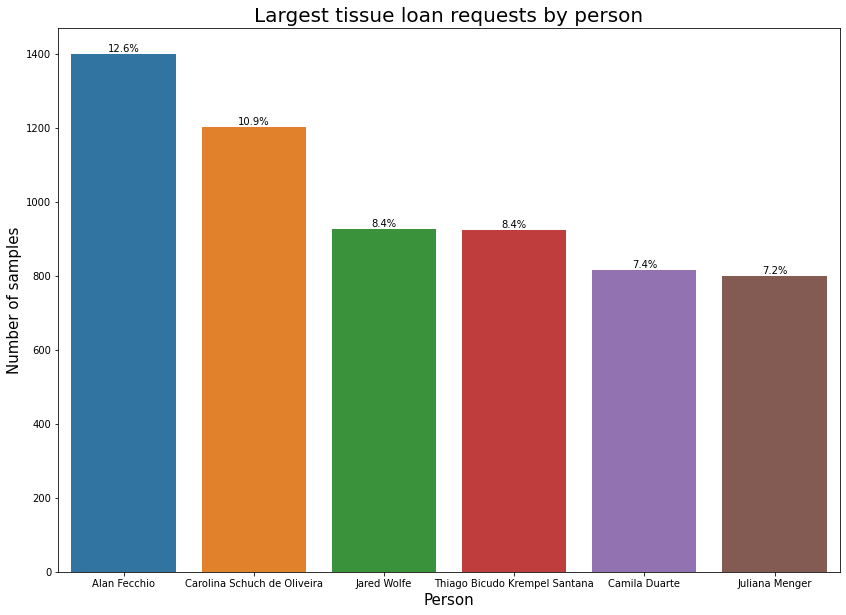

In [153]:
plt.figure(figsize=(14,10))
ax = sns.barplot(y=loans.groupby('para').sum()['number_specimens'].sort_values(ascending=False)[:6],x=loans.groupby('para').sum()['number_specimens'].sort_values(ascending=False).index[:6])
plt.title('Largest tissue loan requests by person',fontsize=20)
plt.xlabel('Person',fontsize=15)
plt.ylabel('Number of samples',fontsize=15)

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/loans['number_specimens'].sum()), (x.mean(), y), ha='center', va='bottom')
        



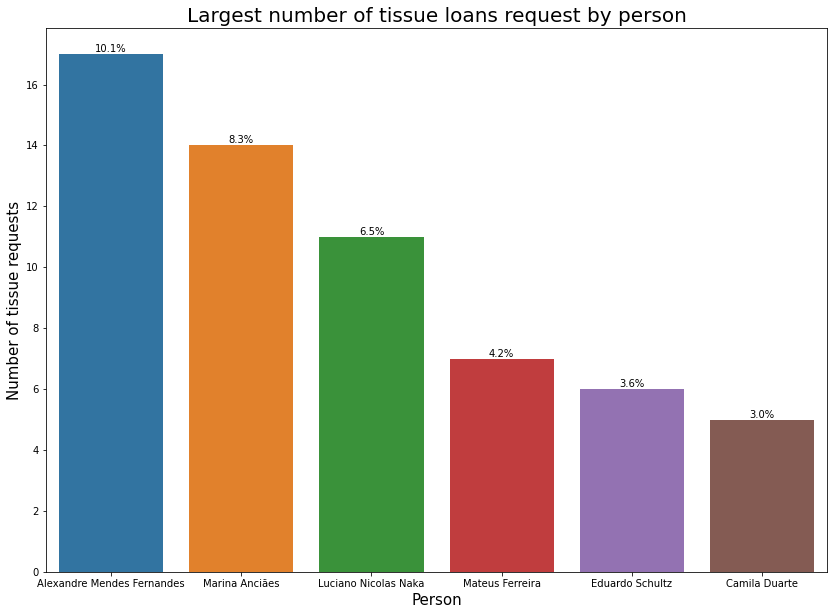

In [155]:
plt.figure(figsize=(14,10))
ax = sns.barplot(y=loans.groupby('para').count()['number_specimens'].sort_values(ascending=False)[:6],x=loans.groupby('para').count()['number_specimens'].sort_values(ascending=False).index[:6])
plt.title('Largest number of tissue loans request by person',fontsize=20)
plt.xlabel('Person',fontsize=15)
plt.ylabel('Number of tissue requests',fontsize=15)

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/loans['number_specimens'].count()), (x.mean(), y), ha='center', va='bottom')
        



### Samples granted by Country

In [156]:
loans.groupby('pais').sum()['number_specimens'].sort_values(ascending=False)

pais
Estados Unidos    6202
Brasil            3661
Alemanha          1036
Suecia             122
Canada              38
Argentina           13
Colombia             6
Name: number_specimens, dtype: int64

In [157]:
loans.groupby('pais').count()['number_specimens'].sort_values(ascending=False)

pais
Brasil            106
Estados Unidos     40
Alemanha           13
Suecia              5
Canada              2
Argentina           1
Colombia            1
Name: number_specimens, dtype: int64

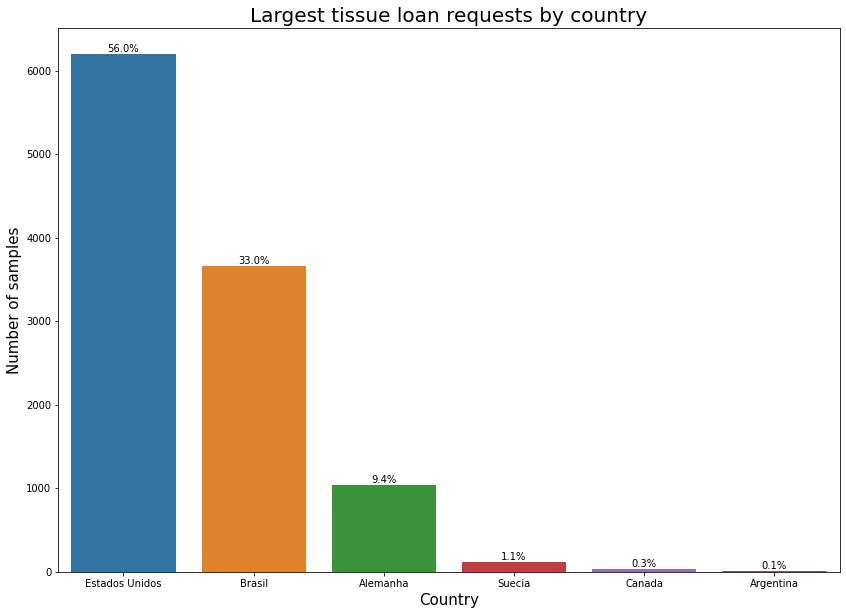

In [158]:
plt.figure(figsize=(14,10))
ax = sns.barplot(y=loans.groupby('pais').sum()['number_specimens'].sort_values(ascending=False)[:6],x=loans.groupby('pais').sum()['number_specimens'].sort_values(ascending=False).index[:6])
plt.title('Largest tissue loan requests by country',fontsize=20)
plt.xlabel('Country',fontsize=15)
plt.ylabel('Number of samples',fontsize=15)

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/loans['number_specimens'].sum()), (x.mean(), y), ha='center', va='bottom')


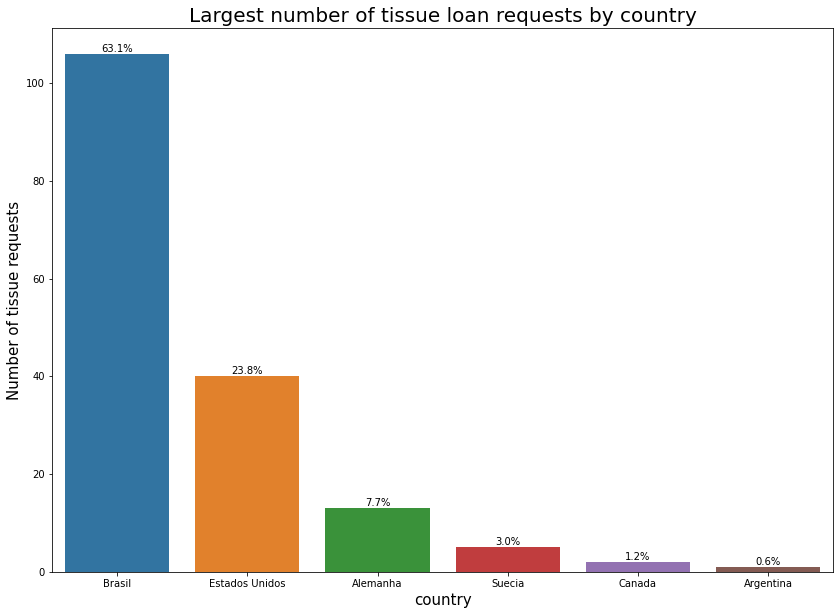

In [159]:
plt.figure(figsize=(14,10))
ax = sns.barplot(y=loans.groupby('pais').count()['number_specimens'].sort_values(ascending=False)[:6],x=loans.groupby('pais').count()['number_specimens'].sort_values(ascending=False).index[:6])
plt.title('Largest number of tissue loan requests by country',fontsize=20)
plt.xlabel('country',fontsize=15)
plt.ylabel('Number of tissue requests',fontsize=15)

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/loans['number_specimens'].count()), (x.mean(), y), ha='center', va='bottom')


### Samples granted by State

In [160]:
loans.groupby('estado').sum()['number_specimens'].sort_values(ascending=False)

estado
Amazonas                     2280
Para                          750
Sao Paulo                     376
Pernambuco                     86
Mins Gerias                    33
Rio de Janeiro                 33
Bahia                          16
Mato Grosso                    10
Rio Grande do Sul               7
Universidade de Sao Paulo       2
Name: number_specimens, dtype: int64

In [161]:
loans.groupby('estado').count()['number_specimens'].sort_values(ascending=False)

estado
Amazonas                     52
Para                         26
Sao Paulo                    11
Pernambuco                    4
Rio Grande do Sul             4
Bahia                         2
Mato Grosso                   2
Rio de Janeiro                2
Mins Gerias                   1
Universidade de Sao Paulo     1
Name: number_specimens, dtype: int64

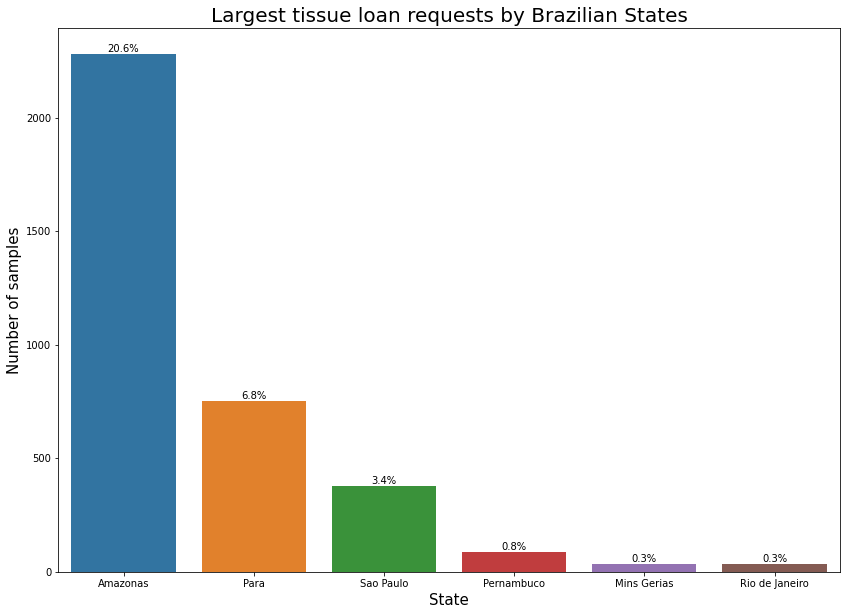

In [162]:
plt.figure(figsize=(14,10))
ax = sns.barplot(y=loans.groupby('estado').sum()['number_specimens'].sort_values(ascending=False)[:6],x=loans.groupby('estado').sum()['number_specimens'].sort_values(ascending=False).index[:6])
plt.title('Largest tissue loan requests by Brazilian States',fontsize=20)
plt.xlabel('State',fontsize=15)
plt.ylabel('Number of samples',fontsize=15)

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/loans['number_specimens'].sum()), (x.mean(), y), ha='center', va='bottom')


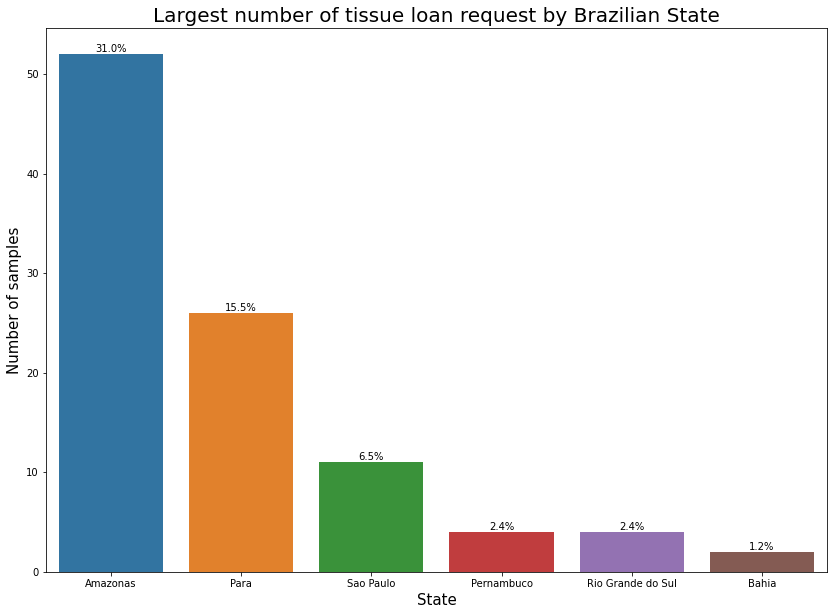

In [163]:
plt.figure(figsize=(14,10))
ax = sns.barplot(y=loans.groupby('estado').count()['number_specimens'].sort_values(ascending=False)[:6],x=loans.groupby('estado').count()['number_specimens'].sort_values(ascending=False).index[:6])
plt.title('Largest number of tissue loan request by Brazilian State',fontsize=20)
plt.xlabel('State',fontsize=15)
plt.ylabel('Number of samples',fontsize=15)

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/loans['number_specimens'].count()), (x.mean(), y), ha='center', va='bottom')


### Samples granted by Institution

In [164]:
loans.groupby('institution').sum()['number_specimens'].sort_values(ascending=False)

institution
University of Missouri                                        2813
Instituto Nacional de Pesquisas da Amazonia                   2369
Louisiana State University                                    1618
Field Museum of Natural History                                978
Helmholtz Centre for Environmental Research                    801
Museu Paraense Emílio Goeldi                                   625
Universidade de São Paulo                                      378
Universitat Heidelberg                                         235
American Museum of Natural History                             189
Louisiana State University, Museum of Natural Science          159
University of Michigan                                         145
Cornell Museum of Vertebrates                                  122
University of Gothenburg                                       122
University of California                                        89
Universidade Federal de Pernambuco                

In [165]:
loans.groupby('institution').count()['number_specimens'].sort_values(ascending=False)

institution
Instituto Nacional de Pesquisas da Amazonia                   52
Museu Paraense Emílio Goeldi                                  19
Universidade de São Paulo                                     12
Universitat Heidelberg                                        10
Louisiana State University                                     9
Field Museum of Natural History                                8
Museu Paraense Emilio Goeldi                                   6
University of Missouri                                         5
American Museum of Natural History                             5
University of Gothenburg                                       5
Louisiana State University, Museum of Natural Science          4
Universidade Federal de Pernambuco                             4
Pontifícia Universidade Católica do Rio Grande do Sul          4
Helmholtz Centre for Environmental Research                    3
Universidade Federal da Bahia                                  2
University of

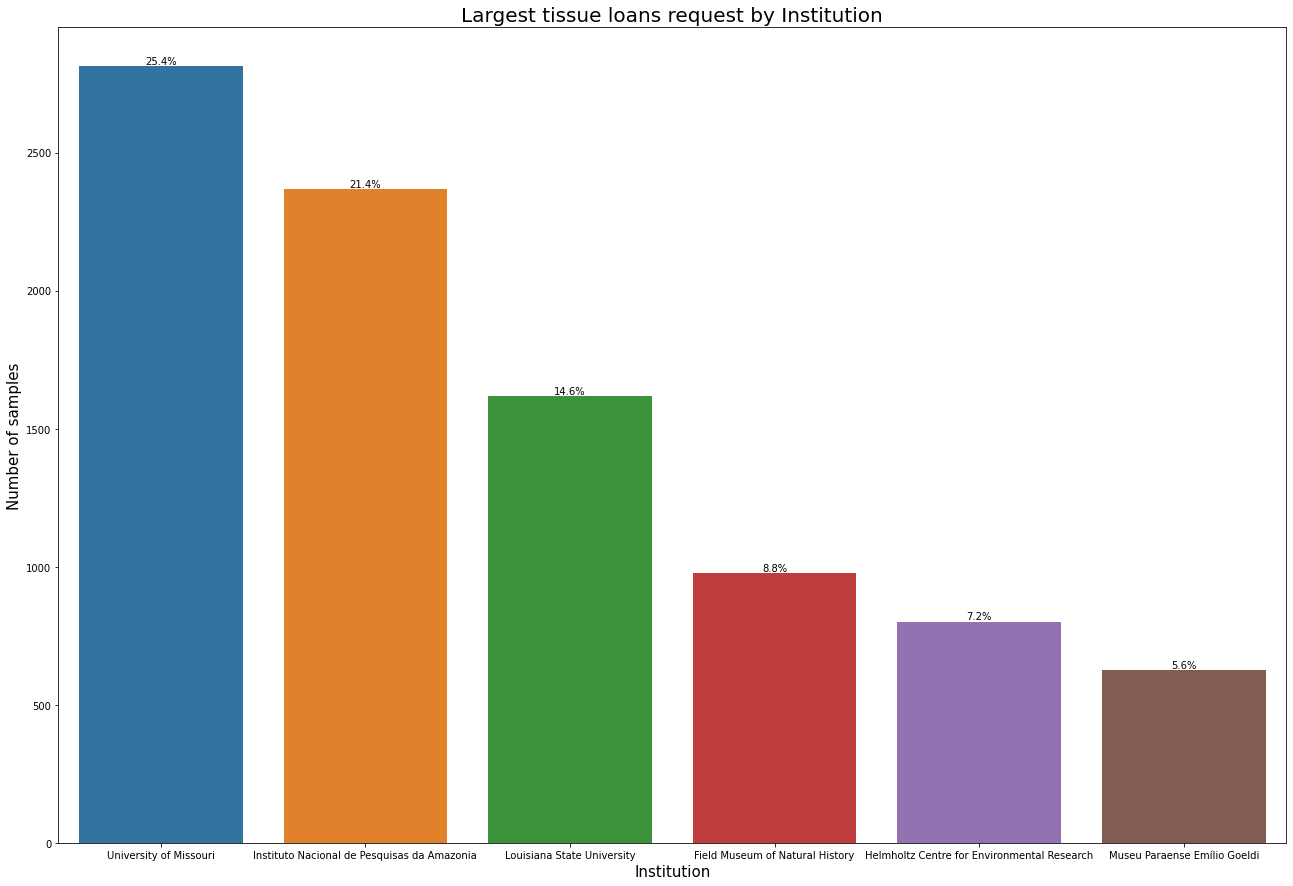

In [166]:
plt.figure(figsize=(22,15))
ax = sns.barplot(y=loans.groupby('institution').sum()['number_specimens'].sort_values(ascending=False)[:6],x=loans.groupby('institution').sum()['number_specimens'].sort_values(ascending=False).index[:6])
plt.title('Largest tissue loans request by Institution',fontsize=20)
plt.xlabel('Institution',fontsize=15)
plt.ylabel('Number of samples',fontsize=15)

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/loans['number_specimens'].sum()), (x.mean(), y), ha='center', va='bottom')


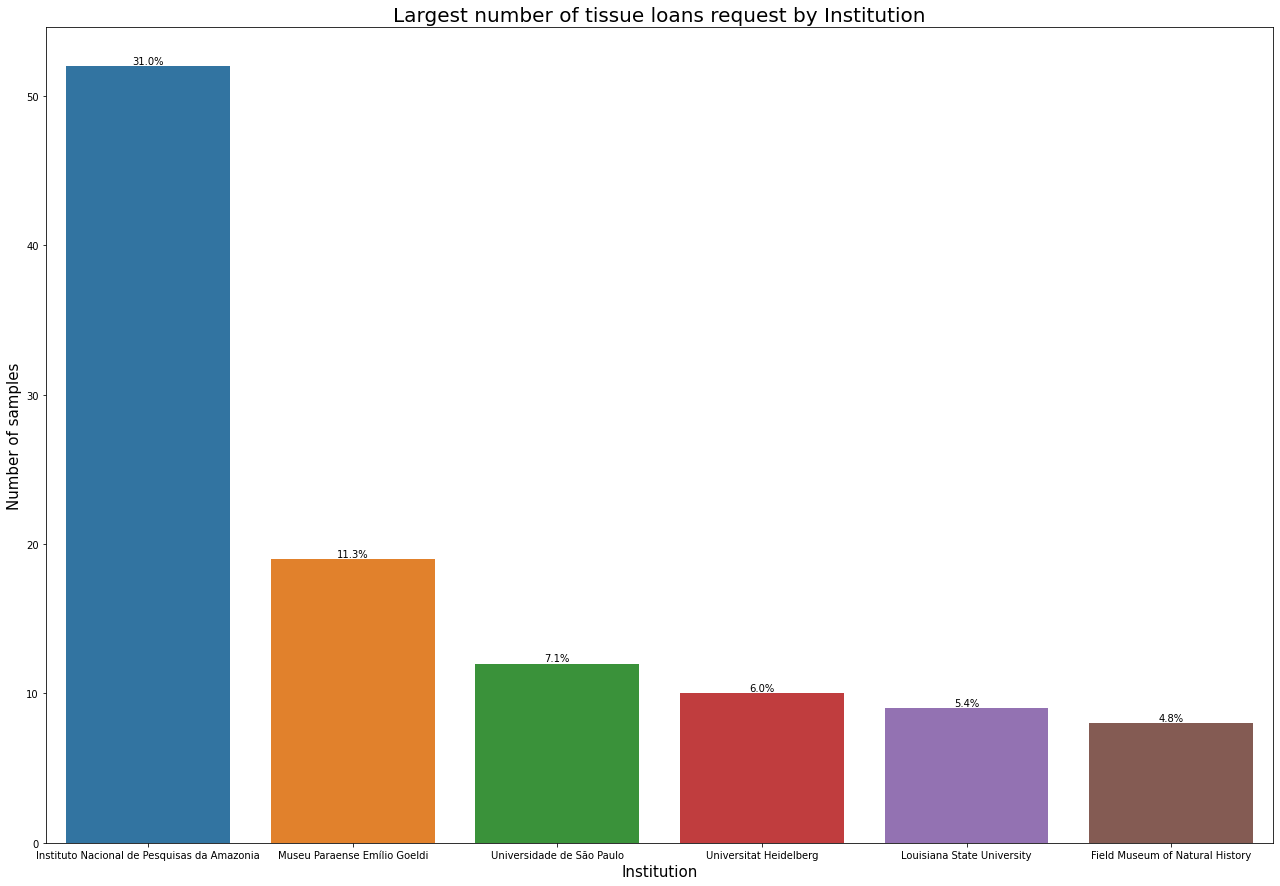

In [167]:
plt.figure(figsize=(22,15))
ax = sns.barplot(y=loans.groupby('institution').count()['number_specimens'].sort_values(ascending=False)[:6],x=loans.groupby('institution').count()['number_specimens'].sort_values(ascending=False).index[:6])
plt.title('Largest number of tissue loans request by Institution',fontsize=20)
plt.xlabel('Institution',fontsize=15)
plt.ylabel('Number of samples',fontsize=15)

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/loans['number_specimens'].count()), (x.mean(), y), ha='center', va='bottom')


In [168]:
loans.groupby(by='year').sum().cumsum().head()


,number_specimens
year,
2004,29
2005,102
2006,210
2007,899
2008,1083


### Samples granted through the years

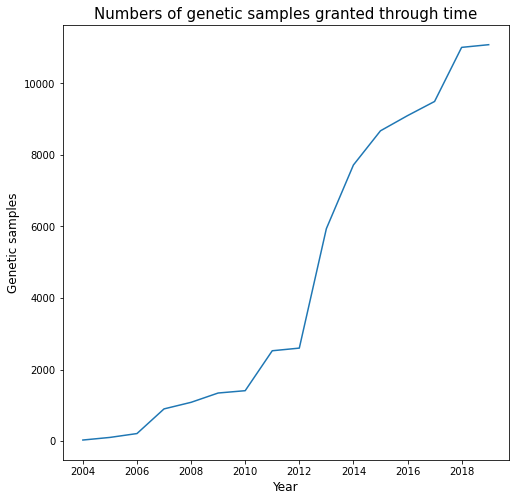

In [212]:
plt.figure(figsize=(8, 8))
sns.lineplot(x=loans.groupby(by='year').sum().cumsum().index, y = loans.groupby(by='year').sum().cumsum()['number_specimens'])
plt.title("Numbers of genetic samples granted through time",fontsize=15)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Genetic samples",fontsize=12)
plt.savefig('../results/figures/cumulative_samples_granted_through_time.pdf')


### Samples granted and collected through time 

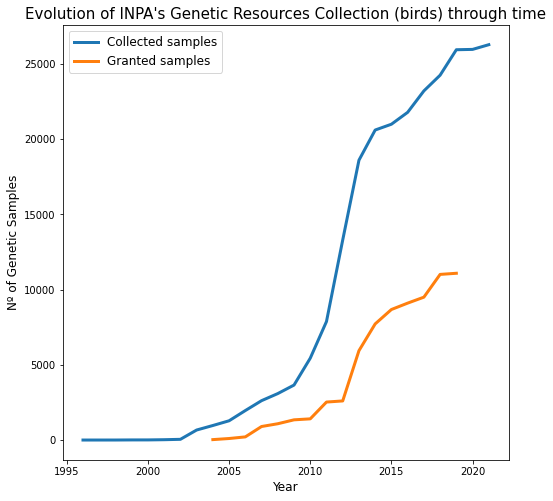

In [221]:
plt.figure(figsize=(8, 8))
sns.lineplot(data=collect_year,x='year', y = 'cumsum',lw=3)
sns.lineplot(x=loans.groupby(by='year').sum().cumsum().index, y = loans.groupby(by='year').sum().cumsum()['number_specimens'],lw=3)
plt.title("Evolution of INPA's Genetic Resources Collection (birds) through time",fontsize=15)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Nº of Genetic Samples",fontsize=12)
plt.legend(labels=['Collected samples','Granted samples'],fontsize=12)
plt.savefig('../results/figures/evolution_collecting_and_grants.pdf')



## Summary descriptive table

In [197]:
summary_statistics = pd.DataFrame([{'Number of specimens':len(data_clean),'Number of Orders':data_clean['ORDEM'].nunique(),
              'Number of Families':data_clean['FAMÍLIA'].nunique(),'Number of Genera':len(genus_accounting),
              'Number of species':len(genus_accounting),
              'Number of Amazonian Species':len(amazonian_species_polygon_based),
              'Number of tissue grants given':len(loans),
              'Number of specimens loaned':loans['number_specimens'].sum(),
              'Nº of countries that requested tissue grants':loans['pais'].nunique(),
              'Nº of Brazilian States that have requested tissue grants':loans['estado'].nunique()}])
summary_statistics

,Number of specimens,Number of Orders,Number of Families,Number of Genera,Number of species,Number of Amazonian Species,Number of tissue grants given,Number of specimens loaned,Nº of countries that requested tissue grants,Nº of Brazilian States that have requested tissue grants
0,26490,24,76,444,444,927,168,11078,7,10


In [198]:
pd.DataFrame([{'Number of specimens':len(data_clean),'Number of Orders':data_clean['ORDEM'].nunique(),
              'Number of Families':data_clean['FAMÍLIA'].nunique(),'Number of Genera':len(genus_accounting),
              'Number of species':len(genus_accounting),
              'Number of Amazonian Species':len(amazonian_species_polygon_based),
              'Number of tissue grants given':len(loans),
              'Number of specimens loaned':loans['number_specimens'].sum(),
              'Nº of countries that requested tissue grants':loans['pais'].nunique(),
              'Nº of Brazilian States that have requested tissue grants':loans['estado'].nunique()}])

,Number of specimens,Number of Orders,Number of Families,Number of Genera,Number of species,Number of Amazonian Species,Number of tissue grants given,Number of specimens loaned,Nº of countries that requested tissue grants,Nº of Brazilian States that have requested tissue grants
0,26490,24,76,444,444,927,168,11078,7,10


In [1893]:
summary_statistics.to_csv('results/collection_summary_statistics.csv')